In [10]:
import os
import cv2
import numpy as np
from PIL import Image
import skimage.io as io
import matplotlib.pyplot as plt
import json
import random
import shutil
import torch, torchvision
import torchvision.transforms as T

In [11]:
print(torch.__version__, torch.cuda.is_available())
torch.set_grad_enabled(False);

CLASSES = ['N/A', 'rebar', 'crack', 'spall', 'bg']

1.8.1+cu111 True


In [12]:
first_class_index = 1
num_classes = 5
finetuned_classes = ['N/A', 'rebar', 'crack', 'spall', 'bg']

# Detection - bbox prediction

In [ ]:
model = torch.hub.load('facebookresearch/detr', 'detr_resnet50', pretrained=True)
model.eval();

# Get pretrained weights
checkpoint = torch.hub.load_state_dict_from_url(
            url='https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth',
            map_location='cpu',
            check_hash=True)

# Remove class weights
del checkpoint["model"]["class_embed.weight"]
del checkpoint["model"]["class_embed.bias"]

# Save
torch.save(checkpoint, 'detr-r50_no-class-head.pth')

<!-- model = torch.hub.load('facebookresearch/detr', 'detr_resnet50', pretrained=True)
model.eval() -->

In [ ]:
! ls 

In [4]:
%cd /media/App/amaranth/projects_source/mitotic_index/python/detr

/media/App/amaranth/projects_source/mitotic_index/python/detr


# Run bbox training for things and stuff

In [ ]:
## first train the BB detection model with 5 classes
!python main.py \
    --dataset_file "coco_panoptic" \
    --coco_path "/media/App/tsai/capstone/coco" \
    --coco_panoptic_path '/media/App/tsai/capstone/coco_panoptic/' \
    --output_dir "/media/App/tsai/capstone/output_jairamjiki_boxmodel/" \
    --num_classes 5 \
    --lr 0.00001 \
    --weight_decay 0.00001 \
    --lr_drop 20 \
    --epochs 200 \
    --resume "/media/App/tsai/capstone/detr-r50_no-class-head.pth"

# detr-50 with separate bboxes for each instance in the segmentation array
Epoch 0
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.346
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.364
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.350
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.142
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.190
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.372
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.457
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.523
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.582
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.230
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.380
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.657

Epoch 150
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.767
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.896
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.798
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.447
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.648
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.825
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.686
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.830
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.858
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.607
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.767
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.917

In [ ]:
# detr-50-panoptic

Epoch [0] 
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.004
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.005
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.005
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.004
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.187
 
 
 Epoch 50
IoU metric: segm
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.110
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.180
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.115
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.004
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.061
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.153
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.150
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.155
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.156
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.016
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.090
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.216
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.767
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.896
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.798
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.447
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.648
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.825
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.686
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.830
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.858
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.607
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.767
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.917

In [ ]:
First epoch for comparison - output from detr-50
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.298
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.318
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.301
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.263
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.172
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.288
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.408
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.491
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.563
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.462
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.310
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.567
 
 At epoch 160 - output from detr-50
 IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.647
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.734
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.656
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.581
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.369
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.659
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.732
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.798
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.872
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.742
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.628
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.904

In [5]:
model = torch.hub.load('facebookresearch/detr', 'detr_resnet50', pretrained=False, num_classes=5)
checkpoint = torch.load('/media/App/tsai/capstone/output_jairamjiki_boxmodel/checkpoint.pth', map_location='cpu')
model.load_state_dict(checkpoint['model'], strict=False)
model.eval();

Using cache found in /home/user/.cache/torch/hub/facebookresearch_detr_master


In [8]:
# standard PyTorch mean-std input image normalization
transform = T.Compose([
    T.Resize(800),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

# for output bounding box post-processing
def box_cxcywh_to_xyxy(x):
    x_c, y_c, w, h = x.unbind(1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h),
         (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=1)


def rescale_bboxes(out_bbox, size):
    img_w, img_h = size
    b = box_cxcywh_to_xyxy(out_bbox)
    b = b * torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
    return b


def filter_bboxes_from_outputs(outputs, threshold=0.7):
  
    # keep only predictions with confidence above threshold
    probas = outputs['pred_logits'].softmax(-1)[0, :, :-1]
    keep = probas.max(-1).values > threshold

    probas_to_keep = probas[keep]

    # convert boxes from [0; 1] to image scales
    bboxes_scaled = rescale_bboxes(outputs['pred_boxes'][0, keep], im.size)
    return probas_to_keep, bboxes_scaled


import matplotlib.pyplot as plt

def plot_results(pil_img, prob=None, boxes=None):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    if prob is not None and boxes is not None:
        for p, (xmin, ymin, xmax, ymax), c in zip(prob, boxes.tolist(), colors):
            ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                    fill=False, color=c, linewidth=3))
            cl = p.argmax()
            text = f'{CLASSES[cl]}: {p[cl]:0.2f}'
            ax.text(xmin, ymin, text, fontsize=15,
                  bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

    
    
def run_workflow(my_image, my_model):
    # mean-std normalize the input image (batch-size: 1)
    img = transform(my_image).unsqueeze(0)

    # propagate through the model
    outputs = my_model(img)
    for threshold in [0.9]:
        probas_to_keep, bboxes_scaled = filter_bboxes_from_outputs(outputs, threshold=threshold)
        plot_results(my_image, probas_to_keep, bboxes_scaled)

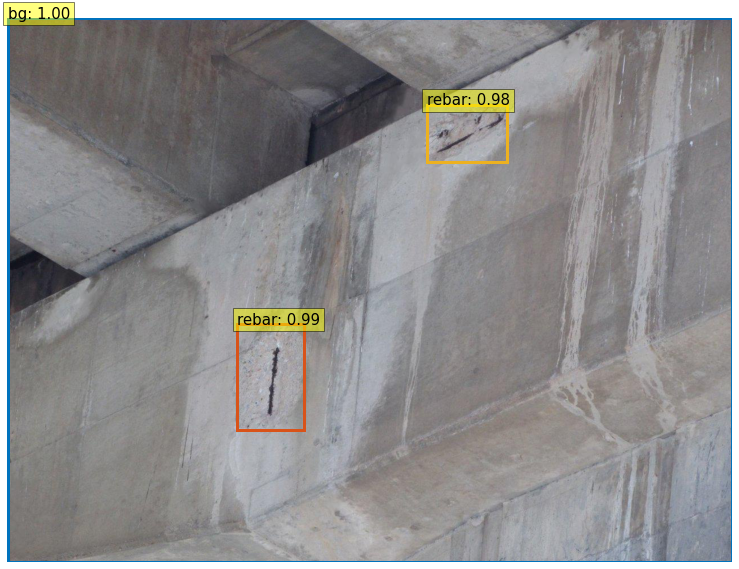

In [9]:
## with training image. Shows output with stuff class, and separate bounding boxes for thing class
im = Image.open('/media/App/tsai/capstone/coco/val2017/17-1.jpg')
run_workflow(im, model)

# Panoptic - Segmentation prediction

In [2]:
## Training for segmentation. Note the resume param is for resuming panoptic model training and the frozen_weights
## param is for providing the box model
!python main.py \
    --masks \
    --epochs 50 \
    --lr_drop 15 \
    --dataset_file 'coco_panoptic' \
    --frozen_weights '/media/App/tsai/capstone/output_jairamjiki_boxmodel/checkpoint0139.pth' \
    --coco_path '/media/App/tsai/capstone/coco' \
    --coco_panoptic_path '/media/App/tsai/capstone/coco_panoptic/' \
    --output_dir '/media/App/tsai/capstone/output_jairamjiki_panoptic'\
    --num_classes 5 \
    --batch_size 2 \
    --num_workers 2


Not using distributed mode
git:
  sha: e42a3b174d2325c28f82d7114138c755ac7c095a, status: has uncommited changes, branch: finetune

Namespace(lr=0.0001, lr_backbone=1e-05, batch_size=2, weight_decay=0.0001, epochs=50, lr_drop=15, clip_max_norm=0.1, frozen_weights='/media/App/tsai/capstone/output_jairamjiki_boxmodel/checkpoint0139.pth', backbone='resnet50', dilation=False, position_embedding='sine', enc_layers=6, dec_layers=6, dim_feedforward=2048, hidden_dim=256, dropout=0.1, nheads=8, num_queries=100, pre_norm=False, masks=True, aux_loss=True, set_cost_class=1, set_cost_bbox=5, set_cost_giou=2, mask_loss_coef=1, dice_loss_coef=1, bbox_loss_coef=5, giou_loss_coef=2, eos_coef=0.1, num_classes=5, dataset_file='coco_panoptic', coco_path='/media/App/tsai/capstone/coco', coco_panoptic_path='/media/App/tsai/capstone/coco_panoptic/', remove_difficult=False, output_dir='/media/App/tsai/capstone/output_jairamjiki_panoptic', device='cuda', seed=42, resume='', start_epoch=0, eval=False, num_worker

Epoch: [0]  [400/577]  eta: 0:00:47  lr: 0.000100  class_error: 0.00  loss: 1.6603 (2.2530)  loss_ce: 0.0073 (0.0365)  loss_bbox: 0.0432 (0.0747)  loss_giou: 0.0548 (0.1178)  loss_mask: 0.0930 (0.0926)  loss_dice: 0.6187 (0.6473)  loss_ce_0: 0.0255 (0.0712)  loss_bbox_0: 0.0765 (0.0922)  loss_giou_0: 0.0786 (0.1410)  loss_ce_1: 0.0114 (0.0520)  loss_bbox_1: 0.0573 (0.0809)  loss_giou_1: 0.0555 (0.1288)  loss_ce_2: 0.0107 (0.0418)  loss_bbox_2: 0.0690 (0.0804)  loss_giou_2: 0.0598 (0.1267)  loss_ce_3: 0.0083 (0.0401)  loss_bbox_3: 0.0521 (0.0748)  loss_giou_3: 0.0575 (0.1219)  loss_ce_4: 0.0078 (0.0379)  loss_bbox_4: 0.0481 (0.0749)  loss_giou_4: 0.0511 (0.1195)  loss_ce_unscaled: 0.0073 (0.0365)  class_error_unscaled: 0.0000 (3.0629)  loss_bbox_unscaled: 0.0086 (0.0149)  loss_giou_unscaled: 0.0274 (0.0589)  cardinality_error_unscaled: 0.0000 (0.1796)  loss_mask_unscaled: 0.0930 (0.0926)  loss_dice_unscaled: 0.6187 (0.6473)  loss_ce_0_unscaled: 0.0255 (0.0712)  loss_bbox_0_unscaled: 0.0

Test:  [144/145]  eta: 0:00:01  class_error: 0.00  loss: 1.9880 (3.0664)  loss_ce: 0.0162 (0.0873)  loss_bbox: 0.0707 (0.1071)  loss_giou: 0.0999 (0.1721)  loss_mask: 0.0963 (0.1015)  loss_dice: 0.6321 (0.6569)  loss_ce_0: 0.0219 (0.1119)  loss_bbox_0: 0.0855 (0.1226)  loss_giou_0: 0.1317 (0.1918)  loss_ce_1: 0.0191 (0.0940)  loss_bbox_1: 0.0730 (0.1190)  loss_giou_1: 0.0996 (0.1792)  loss_ce_2: 0.0169 (0.0902)  loss_bbox_2: 0.0674 (0.1169)  loss_giou_2: 0.1088 (0.1740)  loss_ce_3: 0.0177 (0.0849)  loss_bbox_3: 0.0640 (0.1128)  loss_giou_3: 0.0975 (0.1745)  loss_ce_4: 0.0174 (0.0877)  loss_bbox_4: 0.0701 (0.1095)  loss_giou_4: 0.0968 (0.1726)  loss_ce_unscaled: 0.0162 (0.0873)  class_error_unscaled: 0.0000 (7.2036)  loss_bbox_unscaled: 0.0141 (0.0214)  loss_giou_unscaled: 0.0499 (0.0860)  cardinality_error_unscaled: 0.0000 (0.3552)  loss_mask_unscaled: 0.0963 (0.1015)  loss_dice_unscaled: 0.6321 (0.6569)  loss_ce_0_unscaled: 0.0219 (0.1119)  loss_bbox_0_unscaled: 0.0171 (0.0245)  loss_

Epoch: [1]  [  0/577]  eta: 0:05:12  lr: 0.000100  class_error: 0.00  loss: 1.4778 (1.4778)  loss_ce: 0.0039 (0.0039)  loss_bbox: 0.0674 (0.0674)  loss_giou: 0.0450 (0.0450)  loss_mask: 0.0888 (0.0888)  loss_dice: 0.5750 (0.5750)  loss_ce_0: 0.0146 (0.0146)  loss_bbox_0: 0.1144 (0.1144)  loss_giou_0: 0.0873 (0.0873)  loss_ce_1: 0.0078 (0.0078)  loss_bbox_1: 0.0742 (0.0742)  loss_giou_1: 0.0519 (0.0519)  loss_ce_2: 0.0085 (0.0085)  loss_bbox_2: 0.0588 (0.0588)  loss_giou_2: 0.0387 (0.0387)  loss_ce_3: 0.0063 (0.0063)  loss_bbox_3: 0.0613 (0.0613)  loss_giou_3: 0.0544 (0.0544)  loss_ce_4: 0.0048 (0.0048)  loss_bbox_4: 0.0669 (0.0669)  loss_giou_4: 0.0475 (0.0475)  loss_ce_unscaled: 0.0039 (0.0039)  class_error_unscaled: 0.0000 (0.0000)  loss_bbox_unscaled: 0.0135 (0.0135)  loss_giou_unscaled: 0.0225 (0.0225)  cardinality_error_unscaled: 0.0000 (0.0000)  loss_mask_unscaled: 0.0888 (0.0888)  loss_dice_unscaled: 0.5750 (0.5750)  loss_ce_0_unscaled: 0.0146 (0.0146)  loss_bbox_0_unscaled: 0.0

Epoch: [1]  [500/577]  eta: 0:00:19  lr: 0.000100  class_error: 0.00  loss: 2.0543 (2.2812)  loss_ce: 0.0070 (0.0443)  loss_bbox: 0.0489 (0.0744)  loss_giou: 0.1078 (0.1173)  loss_mask: 0.0898 (0.0893)  loss_dice: 0.6577 (0.6379)  loss_ce_0: 0.0488 (0.0795)  loss_bbox_0: 0.0652 (0.0913)  loss_giou_0: 0.1621 (0.1387)  loss_ce_1: 0.0237 (0.0591)  loss_bbox_1: 0.0507 (0.0830)  loss_giou_1: 0.1360 (0.1294)  loss_ce_2: 0.0128 (0.0506)  loss_bbox_2: 0.0518 (0.0789)  loss_giou_2: 0.1341 (0.1249)  loss_ce_3: 0.0100 (0.0508)  loss_bbox_3: 0.0461 (0.0750)  loss_giou_3: 0.1168 (0.1179)  loss_ce_4: 0.0080 (0.0466)  loss_bbox_4: 0.0465 (0.0742)  loss_giou_4: 0.0954 (0.1182)  loss_ce_unscaled: 0.0070 (0.0443)  class_error_unscaled: 0.0000 (3.9884)  loss_bbox_unscaled: 0.0098 (0.0149)  loss_giou_unscaled: 0.0539 (0.0586)  cardinality_error_unscaled: 0.0000 (0.1587)  loss_mask_unscaled: 0.0898 (0.0893)  loss_dice_unscaled: 0.6577 (0.6379)  loss_ce_0_unscaled: 0.0488 (0.0795)  loss_bbox_0_unscaled: 0.0

DONE (t=0.37s).
Accumulating evaluation results...
DONE (t=0.35s).
IoU metric: segm
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.004
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.006
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.004
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.015
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.015
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.015
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.004
 Average Recall     (AR) @[ IoU=0.50

Epoch: [2]  [200/577]  eta: 0:01:40  lr: 0.000100  class_error: 0.00  loss: 2.4474 (2.3540)  loss_ce: 0.0215 (0.0520)  loss_bbox: 0.0615 (0.0793)  loss_giou: 0.0888 (0.1204)  loss_mask: 0.0859 (0.0889)  loss_dice: 0.6579 (0.6342)  loss_ce_0: 0.0518 (0.0750)  loss_bbox_0: 0.0821 (0.1003)  loss_giou_0: 0.1271 (0.1456)  loss_ce_1: 0.0354 (0.0630)  loss_bbox_1: 0.0780 (0.0884)  loss_giou_1: 0.1293 (0.1317)  loss_ce_2: 0.0279 (0.0520)  loss_bbox_2: 0.0714 (0.0860)  loss_giou_2: 0.1172 (0.1275)  loss_ce_3: 0.0198 (0.0538)  loss_bbox_3: 0.0743 (0.0816)  loss_giou_3: 0.0994 (0.1225)  loss_ce_4: 0.0246 (0.0536)  loss_bbox_4: 0.0606 (0.0774)  loss_giou_4: 0.0968 (0.1209)  loss_ce_unscaled: 0.0215 (0.0520)  class_error_unscaled: 0.0000 (4.8282)  loss_bbox_unscaled: 0.0123 (0.0159)  loss_giou_unscaled: 0.0444 (0.0602)  cardinality_error_unscaled: 0.0000 (0.2139)  loss_mask_unscaled: 0.0859 (0.0889)  loss_dice_unscaled: 0.6579 (0.6342)  loss_ce_0_unscaled: 0.0518 (0.0750)  loss_bbox_0_unscaled: 0.0

Test:  [  0/145]  eta: 0:06:44  class_error: 33.33  loss: 8.6679 (8.6679)  loss_ce: 0.4655 (0.4655)  loss_bbox: 0.1578 (0.1578)  loss_giou: 0.8671 (0.8671)  loss_mask: 0.1111 (0.1111)  loss_dice: 0.7651 (0.7651)  loss_ce_0: 0.2223 (0.2223)  loss_bbox_0: 0.1378 (0.1378)  loss_giou_0: 0.7455 (0.7455)  loss_ce_1: 0.2445 (0.2445)  loss_bbox_1: 0.1428 (0.1428)  loss_giou_1: 0.7974 (0.7974)  loss_ce_2: 0.2666 (0.2666)  loss_bbox_2: 0.1468 (0.1468)  loss_giou_2: 0.7894 (0.7894)  loss_ce_3: 0.3754 (0.3754)  loss_bbox_3: 0.1374 (0.1374)  loss_giou_3: 0.8583 (0.8583)  loss_ce_4: 0.4301 (0.4301)  loss_bbox_4: 0.1446 (0.1446)  loss_giou_4: 0.8625 (0.8625)  loss_ce_unscaled: 0.4655 (0.4655)  class_error_unscaled: 33.3333 (33.3333)  loss_bbox_unscaled: 0.0316 (0.0316)  loss_giou_unscaled: 0.4335 (0.4335)  cardinality_error_unscaled: 1.0000 (1.0000)  loss_mask_unscaled: 0.1111 (0.1111)  loss_dice_unscaled: 0.7651 (0.7651)  loss_ce_0_unscaled: 0.2223 (0.2223)  loss_bbox_0_unscaled: 0.0276 (0.0276)  lo

Evaluation panoptic segmentation metrics:
Ground truth:
	Segmentation folder: /media/App/tsai/capstone/coco_panoptic/panoptic_val2017
	JSON file: /media/App/tsai/capstone/coco_panoptic/annotations/panoptic_val2017.json
Prediction:
	Segmentation folder: /media/App/tsai/capstone/output_jairamjiki_panoptic/panoptic_eval
	JSON file: /media/App/tsai/capstone/output_jairamjiki_panoptic/panoptic_eval/predictions.json
Number of cores: 32, images per core: 10
Core: 1, 0 from 9 images processed
Core: 0, 0 from 10 images processed
Core: 2, 0 from 9 images processed
Core: 3, 0 from 9 images processed
Core: 4, 0 from 9 images processed
Core: 6, 0 from 9 images processed
Core: 7, 0 from 9 images processed
Core: 8, 0 from 9 images processed
Core: 5, 0 from 9 images processed
Core: 9, 0 from 9 images processed
Core: 11, 0 from 9 images processed
Core: 10, 0 from 9 images processed
Core: 12, 0 from 9 images processed
Core: 14, 0 from 9 images processed
Core: 16, 0 from 9 images processed
Core: 15, 0 fr

Epoch: [3]  [300/577]  eta: 0:01:12  lr: 0.000100  class_error: 10.00  loss: 2.1141 (2.2832)  loss_ce: 0.0169 (0.0424)  loss_bbox: 0.0660 (0.0723)  loss_giou: 0.1062 (0.1209)  loss_mask: 0.0902 (0.0867)  loss_dice: 0.6236 (0.6403)  loss_ce_0: 0.0468 (0.0745)  loss_bbox_0: 0.0752 (0.0902)  loss_giou_0: 0.1054 (0.1438)  loss_ce_1: 0.0216 (0.0585)  loss_bbox_1: 0.0672 (0.0797)  loss_giou_1: 0.0930 (0.1320)  loss_ce_2: 0.0252 (0.0524)  loss_bbox_2: 0.0706 (0.0752)  loss_giou_2: 0.1052 (0.1271)  loss_ce_3: 0.0217 (0.0461)  loss_bbox_3: 0.0598 (0.0754)  loss_giou_3: 0.0995 (0.1250)  loss_ce_4: 0.0186 (0.0449)  loss_bbox_4: 0.0598 (0.0729)  loss_giou_4: 0.0987 (0.1230)  loss_ce_unscaled: 0.0169 (0.0424)  class_error_unscaled: 0.0000 (3.8601)  loss_bbox_unscaled: 0.0132 (0.0145)  loss_giou_unscaled: 0.0531 (0.0605)  cardinality_error_unscaled: 0.0000 (0.1944)  loss_mask_unscaled: 0.0902 (0.0867)  loss_dice_unscaled: 0.6236 (0.6403)  loss_ce_0_unscaled: 0.0468 (0.0745)  loss_bbox_0_unscaled: 0.

Test:  [100/145]  eta: 0:01:12  class_error: 20.00  loss: 2.0695 (3.1461)  loss_ce: 0.0093 (0.0911)  loss_bbox: 0.0728 (0.1105)  loss_giou: 0.1121 (0.1783)  loss_mask: 0.0938 (0.0922)  loss_dice: 0.6301 (0.6635)  loss_ce_0: 0.0218 (0.1169)  loss_bbox_0: 0.0951 (0.1255)  loss_giou_0: 0.1278 (0.1965)  loss_ce_1: 0.0158 (0.0953)  loss_bbox_1: 0.0742 (0.1264)  loss_giou_1: 0.1207 (0.1858)  loss_ce_2: 0.0113 (0.0945)  loss_bbox_2: 0.0756 (0.1224)  loss_giou_2: 0.1265 (0.1788)  loss_ce_3: 0.0085 (0.0877)  loss_bbox_3: 0.0777 (0.1177)  loss_giou_3: 0.1199 (0.1803)  loss_ce_4: 0.0095 (0.0909)  loss_bbox_4: 0.0755 (0.1135)  loss_giou_4: 0.1130 (0.1782)  loss_ce_unscaled: 0.0093 (0.0911)  class_error_unscaled: 0.0000 (7.4450)  loss_bbox_unscaled: 0.0146 (0.0221)  loss_giou_unscaled: 0.0561 (0.0891)  cardinality_error_unscaled: 0.0000 (0.3564)  loss_mask_unscaled: 0.0938 (0.0922)  loss_dice_unscaled: 0.6301 (0.6635)  loss_ce_0_unscaled: 0.0218 (0.1169)  loss_bbox_0_unscaled: 0.0190 (0.0251)  loss

Core: 31, 0 from 9 images processed
Core: 5, all 9 images processed
Core: 19, all 9 images processed
Core: 30, all 9 images processed
Core: 3, all 9 images processed
Core: 10, all 9 images processed
Core: 28, all 9 images processed
Core: 2, all 9 images processed
Core: 20, all 9 images processed
Core: 14, all 9 images processed
Core: 25, all 9 images processed
Core: 21, all 9 images processed
Core: 6, all 9 images processed
Core: 23, all 9 images processed
Core: 24, all 9 images processed
Core: 0, all 10 images processed
Core: 9, all 9 images processed
Core: 7, all 9 images processed
Core: 17, all 9 images processed
Core: 13, all 9 images processed
Core: 22, all 9 images processed
Core: 15, all 9 images processed
Core: 16, all 9 images processed
Core: 11, all 9 images processed
Core: 4, all 9 images processed
Core: 29, all 9 images processed
Core: 26, all 9 images processed
Core: 12, all 9 images processed
Core: 18, all 9 images processed
Core: 8, all 9 images processed
Core: 27, all 9

Epoch: [4]  [400/577]  eta: 0:00:46  lr: 0.000100  class_error: 0.00  loss: 2.0388 (2.2859)  loss_ce: 0.0076 (0.0460)  loss_bbox: 0.0510 (0.0748)  loss_giou: 0.0963 (0.1160)  loss_mask: 0.0833 (0.0871)  loss_dice: 0.6228 (0.6362)  loss_ce_0: 0.0441 (0.0758)  loss_bbox_0: 0.0749 (0.0925)  loss_giou_0: 0.1156 (0.1441)  loss_ce_1: 0.0238 (0.0592)  loss_bbox_1: 0.0723 (0.0824)  loss_giou_1: 0.1166 (0.1302)  loss_ce_2: 0.0107 (0.0506)  loss_bbox_2: 0.0631 (0.0803)  loss_giou_2: 0.1150 (0.1244)  loss_ce_3: 0.0073 (0.0486)  loss_bbox_3: 0.0557 (0.0750)  loss_giou_3: 0.1005 (0.1213)  loss_ce_4: 0.0076 (0.0459)  loss_bbox_4: 0.0507 (0.0760)  loss_giou_4: 0.0922 (0.1194)  loss_ce_unscaled: 0.0076 (0.0460)  class_error_unscaled: 0.0000 (4.1025)  loss_bbox_unscaled: 0.0102 (0.0150)  loss_giou_unscaled: 0.0482 (0.0580)  cardinality_error_unscaled: 0.0000 (0.2020)  loss_mask_unscaled: 0.0833 (0.0871)  loss_dice_unscaled: 0.6228 (0.6362)  loss_ce_0_unscaled: 0.0441 (0.0758)  loss_bbox_0_unscaled: 0.0

Test:  [144/145]  eta: 0:00:01  class_error: 0.00  loss: 2.0184 (3.0649)  loss_ce: 0.0162 (0.0873)  loss_bbox: 0.0707 (0.1071)  loss_giou: 0.0999 (0.1721)  loss_mask: 0.0757 (0.0772)  loss_dice: 0.6397 (0.6798)  loss_ce_0: 0.0219 (0.1119)  loss_bbox_0: 0.0855 (0.1226)  loss_giou_0: 0.1317 (0.1918)  loss_ce_1: 0.0191 (0.0940)  loss_bbox_1: 0.0730 (0.1190)  loss_giou_1: 0.0996 (0.1792)  loss_ce_2: 0.0169 (0.0902)  loss_bbox_2: 0.0674 (0.1169)  loss_giou_2: 0.1088 (0.1740)  loss_ce_3: 0.0177 (0.0849)  loss_bbox_3: 0.0640 (0.1128)  loss_giou_3: 0.0975 (0.1745)  loss_ce_4: 0.0174 (0.0877)  loss_bbox_4: 0.0701 (0.1095)  loss_giou_4: 0.0968 (0.1726)  loss_ce_unscaled: 0.0162 (0.0873)  class_error_unscaled: 0.0000 (7.2036)  loss_bbox_unscaled: 0.0141 (0.0214)  loss_giou_unscaled: 0.0499 (0.0860)  cardinality_error_unscaled: 0.0000 (0.3552)  loss_mask_unscaled: 0.0757 (0.0772)  loss_dice_unscaled: 0.6397 (0.6798)  loss_ce_0_unscaled: 0.0219 (0.1119)  loss_bbox_0_unscaled: 0.0171 (0.0245)  loss_

Core: 1, all 9 images processed
          |    PQ     SQ     RQ     N
--------------------------------------
All       |  21.1   54.4   24.7     4
Things    |   0.6   43.8    0.9     3
Stuff     |  82.7   86.0   96.2     1
Time elapsed: 3.77 seconds
Epoch: [5]  [  0/577]  eta: 0:07:30  lr: 0.000100  class_error: 0.00  loss: 1.4951 (1.4951)  loss_ce: 0.0053 (0.0053)  loss_bbox: 0.0396 (0.0396)  loss_giou: 0.0802 (0.0802)  loss_mask: 0.0694 (0.0694)  loss_dice: 0.6574 (0.6574)  loss_ce_0: 0.0143 (0.0143)  loss_bbox_0: 0.0328 (0.0328)  loss_giou_0: 0.0924 (0.0924)  loss_ce_1: 0.0093 (0.0093)  loss_bbox_1: 0.0441 (0.0441)  loss_giou_1: 0.0722 (0.0722)  loss_ce_2: 0.0090 (0.0090)  loss_bbox_2: 0.0423 (0.0423)  loss_giou_2: 0.0651 (0.0651)  loss_ce_3: 0.0069 (0.0069)  loss_bbox_3: 0.0408 (0.0408)  loss_giou_3: 0.0776 (0.0776)  loss_ce_4: 0.0054 (0.0054)  loss_bbox_4: 0.0443 (0.0443)  loss_giou_4: 0.0866 (0.0866)  loss_ce_unscaled: 0.0053 (0.0053)  class_error_unscaled: 0.0000 (0.0000)  loss_

Epoch: [5]  [500/577]  eta: 0:00:20  lr: 0.000100  class_error: 0.00  loss: 2.2281 (2.3146)  loss_ce: 0.0178 (0.0491)  loss_bbox: 0.0554 (0.0789)  loss_giou: 0.1085 (0.1210)  loss_mask: 0.0685 (0.0812)  loss_dice: 0.5907 (0.6097)  loss_ce_0: 0.0738 (0.0837)  loss_bbox_0: 0.0755 (0.0935)  loss_giou_0: 0.1216 (0.1425)  loss_ce_1: 0.0301 (0.0648)  loss_bbox_1: 0.0860 (0.0852)  loss_giou_1: 0.1205 (0.1317)  loss_ce_2: 0.0215 (0.0570)  loss_bbox_2: 0.0668 (0.0813)  loss_giou_2: 0.1191 (0.1256)  loss_ce_3: 0.0187 (0.0549)  loss_bbox_3: 0.0647 (0.0799)  loss_giou_3: 0.1084 (0.1235)  loss_ce_4: 0.0179 (0.0514)  loss_bbox_4: 0.0594 (0.0785)  loss_giou_4: 0.1045 (0.1212)  loss_ce_unscaled: 0.0178 (0.0491)  class_error_unscaled: 0.0000 (4.3528)  loss_bbox_unscaled: 0.0111 (0.0158)  loss_giou_unscaled: 0.0543 (0.0605)  cardinality_error_unscaled: 0.5000 (0.1906)  loss_mask_unscaled: 0.0685 (0.0812)  loss_dice_unscaled: 0.5907 (0.6097)  loss_ce_0_unscaled: 0.0738 (0.0837)  loss_bbox_0_unscaled: 0.0

DONE (t=0.34s).
Accumulating evaluation results...
DONE (t=0.32s).
IoU metric: segm
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.047
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.086
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.052
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.028
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.065
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.076
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.079
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.079
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.002
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.031
 Average Recall     (AR) @[ IoU=0.50

Epoch: [6]  [200/577]  eta: 0:01:40  lr: 0.000100  class_error: 0.00  loss: 2.1644 (2.2516)  loss_ce: 0.0138 (0.0499)  loss_bbox: 0.0705 (0.0760)  loss_giou: 0.1032 (0.1200)  loss_mask: 0.0592 (0.0918)  loss_dice: 0.4858 (0.5395)  loss_ce_0: 0.0340 (0.0828)  loss_bbox_0: 0.0963 (0.0951)  loss_giou_0: 0.1133 (0.1445)  loss_ce_1: 0.0172 (0.0679)  loss_bbox_1: 0.0887 (0.0821)  loss_giou_1: 0.0970 (0.1316)  loss_ce_2: 0.0175 (0.0577)  loss_bbox_2: 0.0718 (0.0804)  loss_giou_2: 0.1068 (0.1279)  loss_ce_3: 0.0162 (0.0573)  loss_bbox_3: 0.0702 (0.0762)  loss_giou_3: 0.1011 (0.1242)  loss_ce_4: 0.0191 (0.0500)  loss_bbox_4: 0.0708 (0.0755)  loss_giou_4: 0.0904 (0.1213)  loss_ce_unscaled: 0.0138 (0.0499)  class_error_unscaled: 0.0000 (4.7003)  loss_bbox_unscaled: 0.0141 (0.0152)  loss_giou_unscaled: 0.0516 (0.0600)  cardinality_error_unscaled: 0.0000 (0.2090)  loss_mask_unscaled: 0.0592 (0.0918)  loss_dice_unscaled: 0.4858 (0.5395)  loss_ce_0_unscaled: 0.0340 (0.0828)  loss_bbox_0_unscaled: 0.0

Test:  [  0/145]  eta: 0:05:43  class_error: 33.33  loss: 8.3787 (8.3787)  loss_ce: 0.4655 (0.4655)  loss_bbox: 0.1578 (0.1578)  loss_giou: 0.8671 (0.8671)  loss_mask: 0.0083 (0.0083)  loss_dice: 0.5787 (0.5787)  loss_ce_0: 0.2223 (0.2223)  loss_bbox_0: 0.1378 (0.1378)  loss_giou_0: 0.7455 (0.7455)  loss_ce_1: 0.2445 (0.2445)  loss_bbox_1: 0.1428 (0.1428)  loss_giou_1: 0.7974 (0.7974)  loss_ce_2: 0.2666 (0.2666)  loss_bbox_2: 0.1468 (0.1468)  loss_giou_2: 0.7894 (0.7894)  loss_ce_3: 0.3754 (0.3754)  loss_bbox_3: 0.1374 (0.1374)  loss_giou_3: 0.8583 (0.8583)  loss_ce_4: 0.4301 (0.4301)  loss_bbox_4: 0.1446 (0.1446)  loss_giou_4: 0.8625 (0.8625)  loss_ce_unscaled: 0.4655 (0.4655)  class_error_unscaled: 33.3333 (33.3333)  loss_bbox_unscaled: 0.0316 (0.0316)  loss_giou_unscaled: 0.4335 (0.4335)  cardinality_error_unscaled: 1.0000 (1.0000)  loss_mask_unscaled: 0.0083 (0.0083)  loss_dice_unscaled: 0.5787 (0.5787)  loss_ce_0_unscaled: 0.2223 (0.2223)  loss_bbox_0_unscaled: 0.0276 (0.0276)  lo

Core: 0, 0 from 10 images processed
Core: 1, 0 from 9 images processed
Core: 2, 0 from 9 images processed
Core: 3, 0 from 9 images processed
Core: 4, 0 from 9 images processed
Core: 5, 0 from 9 images processed
Core: 6, 0 from 9 images processed
Core: 7, 0 from 9 images processed
Core: 8, 0 from 9 images processed
Core: 10, 0 from 9 images processed
Core: 9, 0 from 9 images processed
Core: 11, 0 from 9 images processed
Core: 13, 0 from 9 images processed
Core: 12, 0 from 9 images processed
Core: 14, 0 from 9 images processed
Core: 16, 0 from 9 images processed
Core: 15, 0 from 9 images processed
Core: 19, 0 from 9 images processed
Core: 20, 0 from 9 images processed
Core: 17, 0 from 9 images processed
Core: 18, 0 from 9 images processed
Core: 23, 0 from 9 images processed
Core: 21, 0 from 9 images processed
Core: 22, 0 from 9 images processed
Core: 26, 0 from 9 images processed
Core: 25, 0 from 9 images processed
Core: 27, 0 from 9 images processed
Core: 24, 0 from 9 images processed
C

Epoch: [7]  [400/577]  eta: 0:00:46  lr: 0.000100  class_error: 0.00  loss: 1.3694 (2.0103)  loss_ce: 0.0066 (0.0420)  loss_bbox: 0.0439 (0.0756)  loss_giou: 0.0580 (0.1175)  loss_mask: 0.0804 (0.1004)  loss_dice: 0.2919 (0.3655)  loss_ce_0: 0.0367 (0.0737)  loss_bbox_0: 0.0619 (0.0923)  loss_giou_0: 0.0910 (0.1416)  loss_ce_1: 0.0179 (0.0561)  loss_bbox_1: 0.0498 (0.0820)  loss_giou_1: 0.0645 (0.1270)  loss_ce_2: 0.0113 (0.0488)  loss_bbox_2: 0.0548 (0.0810)  loss_giou_2: 0.0501 (0.1243)  loss_ce_3: 0.0085 (0.0458)  loss_bbox_3: 0.0479 (0.0783)  loss_giou_3: 0.0543 (0.1209)  loss_ce_4: 0.0070 (0.0433)  loss_bbox_4: 0.0465 (0.0758)  loss_giou_4: 0.0559 (0.1185)  loss_ce_unscaled: 0.0066 (0.0420)  class_error_unscaled: 0.0000 (3.4751)  loss_bbox_unscaled: 0.0088 (0.0151)  loss_giou_unscaled: 0.0290 (0.0588)  cardinality_error_unscaled: 0.0000 (0.2057)  loss_mask_unscaled: 0.0804 (0.1004)  loss_dice_unscaled: 0.2919 (0.3655)  loss_ce_0_unscaled: 0.0367 (0.0737)  loss_bbox_0_unscaled: 0.0

Test:  [144/145]  eta: 0:00:01  class_error: 0.00  loss: 1.6348 (2.7366)  loss_ce: 0.0162 (0.0873)  loss_bbox: 0.0707 (0.1071)  loss_giou: 0.0999 (0.1721)  loss_mask: 0.0316 (0.0916)  loss_dice: 0.2805 (0.3370)  loss_ce_0: 0.0219 (0.1119)  loss_bbox_0: 0.0855 (0.1226)  loss_giou_0: 0.1317 (0.1918)  loss_ce_1: 0.0191 (0.0940)  loss_bbox_1: 0.0730 (0.1190)  loss_giou_1: 0.0996 (0.1792)  loss_ce_2: 0.0169 (0.0902)  loss_bbox_2: 0.0674 (0.1169)  loss_giou_2: 0.1088 (0.1740)  loss_ce_3: 0.0177 (0.0849)  loss_bbox_3: 0.0640 (0.1128)  loss_giou_3: 0.0975 (0.1745)  loss_ce_4: 0.0174 (0.0877)  loss_bbox_4: 0.0701 (0.1095)  loss_giou_4: 0.0968 (0.1726)  loss_ce_unscaled: 0.0162 (0.0873)  class_error_unscaled: 0.0000 (7.2036)  loss_bbox_unscaled: 0.0141 (0.0214)  loss_giou_unscaled: 0.0499 (0.0860)  cardinality_error_unscaled: 0.0000 (0.3552)  loss_mask_unscaled: 0.0316 (0.0916)  loss_dice_unscaled: 0.2805 (0.3370)  loss_ce_0_unscaled: 0.0219 (0.1119)  loss_bbox_0_unscaled: 0.0171 (0.0245)  loss_

Core: 31, all 9 images processed
          |    PQ     SQ     RQ     N
--------------------------------------
All       |  41.0   78.4   48.6     4
Things    |  23.7   73.4   31.7     3
Stuff     |  92.7   93.4   99.3     1
Time elapsed: 4.05 seconds
Epoch: [8]  [  0/577]  eta: 0:04:51  lr: 0.000100  class_error: 20.00  loss: 2.3688 (2.3688)  loss_ce: 0.1347 (0.1347)  loss_bbox: 0.0998 (0.0998)  loss_giou: 0.0765 (0.0765)  loss_mask: 0.0602 (0.0602)  loss_dice: 0.3403 (0.3403)  loss_ce_0: 0.0731 (0.0731)  loss_bbox_0: 0.1906 (0.1906)  loss_giou_0: 0.1113 (0.1113)  loss_ce_1: 0.0463 (0.0463)  loss_bbox_1: 0.1855 (0.1855)  loss_giou_1: 0.0971 (0.0971)  loss_ce_2: 0.1573 (0.1573)  loss_bbox_2: 0.0914 (0.0914)  loss_giou_2: 0.0783 (0.0783)  loss_ce_3: 0.0469 (0.0469)  loss_bbox_3: 0.1642 (0.1642)  loss_giou_3: 0.1013 (0.1013)  loss_ce_4: 0.0470 (0.0470)  loss_bbox_4: 0.1643 (0.1643)  loss_giou_4: 0.1027 (0.1027)  loss_ce_unscaled: 0.1347 (0.1347)  class_error_unscaled: 20.0000 (20.0000)  l

Epoch: [8]  [500/577]  eta: 0:00:20  lr: 0.000100  class_error: 0.00  loss: 1.7689 (1.9835)  loss_ce: 0.0162 (0.0459)  loss_bbox: 0.0634 (0.0754)  loss_giou: 0.0930 (0.1198)  loss_mask: 0.0131 (0.0974)  loss_dice: 0.2624 (0.3105)  loss_ce_0: 0.0603 (0.0749)  loss_bbox_0: 0.0667 (0.0910)  loss_giou_0: 0.1346 (0.1421)  loss_ce_1: 0.0285 (0.0586)  loss_bbox_1: 0.0650 (0.0822)  loss_giou_1: 0.1141 (0.1308)  loss_ce_2: 0.0230 (0.0504)  loss_bbox_2: 0.0609 (0.0815)  loss_giou_2: 0.1237 (0.1292)  loss_ce_3: 0.0186 (0.0485)  loss_bbox_3: 0.0638 (0.0764)  loss_giou_3: 0.1068 (0.1235)  loss_ce_4: 0.0178 (0.0455)  loss_bbox_4: 0.0645 (0.0773)  loss_giou_4: 0.0886 (0.1224)  loss_ce_unscaled: 0.0162 (0.0459)  class_error_unscaled: 0.0000 (3.6818)  loss_bbox_unscaled: 0.0127 (0.0151)  loss_giou_unscaled: 0.0465 (0.0599)  cardinality_error_unscaled: 0.0000 (0.1986)  loss_mask_unscaled: 0.0131 (0.0974)  loss_dice_unscaled: 0.2624 (0.3105)  loss_ce_0_unscaled: 0.0603 (0.0749)  loss_bbox_0_unscaled: 0.0

DONE (t=0.39s).
Accumulating evaluation results...
DONE (t=0.33s).
IoU metric: segm
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.089
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.147
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.090
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.007
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.058
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.124
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.130
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.134
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.135
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.006
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.064
 Average Recall     (AR) @[ IoU=0.50

Epoch: [9]  [200/577]  eta: 0:01:40  lr: 0.000100  class_error: 0.00  loss: 1.9120 (1.8858)  loss_ce: 0.0123 (0.0480)  loss_bbox: 0.0579 (0.0743)  loss_giou: 0.0999 (0.1108)  loss_mask: 0.0107 (0.0765)  loss_dice: 0.2421 (0.2649)  loss_ce_0: 0.0548 (0.0794)  loss_bbox_0: 0.0869 (0.0932)  loss_giou_0: 0.1414 (0.1360)  loss_ce_1: 0.0220 (0.0585)  loss_bbox_1: 0.0725 (0.0818)  loss_giou_1: 0.1132 (0.1245)  loss_ce_2: 0.0165 (0.0525)  loss_bbox_2: 0.0609 (0.0811)  loss_giou_2: 0.1136 (0.1224)  loss_ce_3: 0.0118 (0.0524)  loss_bbox_3: 0.0576 (0.0769)  loss_giou_3: 0.1075 (0.1167)  loss_ce_4: 0.0131 (0.0476)  loss_bbox_4: 0.0625 (0.0754)  loss_giou_4: 0.0959 (0.1129)  loss_ce_unscaled: 0.0123 (0.0480)  class_error_unscaled: 0.0000 (4.3422)  loss_bbox_unscaled: 0.0116 (0.0149)  loss_giou_unscaled: 0.0500 (0.0554)  cardinality_error_unscaled: 0.0000 (0.1766)  loss_mask_unscaled: 0.0107 (0.0765)  loss_dice_unscaled: 0.2421 (0.2649)  loss_ce_0_unscaled: 0.0548 (0.0794)  loss_bbox_0_unscaled: 0.0

Test:  [  0/145]  eta: 0:05:59  class_error: 33.33  loss: 8.5803 (8.5803)  loss_ce: 0.4655 (0.4655)  loss_bbox: 0.1578 (0.1578)  loss_giou: 0.8671 (0.8671)  loss_mask: 0.1791 (0.1791)  loss_dice: 0.6096 (0.6096)  loss_ce_0: 0.2223 (0.2223)  loss_bbox_0: 0.1378 (0.1378)  loss_giou_0: 0.7455 (0.7455)  loss_ce_1: 0.2445 (0.2445)  loss_bbox_1: 0.1428 (0.1428)  loss_giou_1: 0.7974 (0.7974)  loss_ce_2: 0.2666 (0.2666)  loss_bbox_2: 0.1468 (0.1468)  loss_giou_2: 0.7894 (0.7894)  loss_ce_3: 0.3754 (0.3754)  loss_bbox_3: 0.1374 (0.1374)  loss_giou_3: 0.8583 (0.8583)  loss_ce_4: 0.4301 (0.4301)  loss_bbox_4: 0.1446 (0.1446)  loss_giou_4: 0.8625 (0.8625)  loss_ce_unscaled: 0.4655 (0.4655)  class_error_unscaled: 33.3333 (33.3333)  loss_bbox_unscaled: 0.0316 (0.0316)  loss_giou_unscaled: 0.4335 (0.4335)  cardinality_error_unscaled: 1.0000 (1.0000)  loss_mask_unscaled: 0.1791 (0.1791)  loss_dice_unscaled: 0.6096 (0.6096)  loss_ce_0_unscaled: 0.2223 (0.2223)  loss_bbox_0_unscaled: 0.0276 (0.0276)  lo

Core: 1, 0 from 9 images processed
Core: 2, 0 from 9 images processed
Core: 0, 0 from 10 images processed
Core: 4, 0 from 9 images processed
Core: 3, 0 from 9 images processed
Core: 12, 0 from 9 images processed
Core: 5, 0 from 9 images processed
Core: 13, 0 from 9 images processed
Core: 10, 0 from 9 images processed
Core: 9, 0 from 9 images processed
Core: 11, 0 from 9 images processed
Core: 18, 0 from 9 images processed
Core: 7, 0 from 9 images processed
Core: 8, 0 from 9 images processed
Core: 14, 0 from 9 images processed
Core: 6, 0 from 9 images processed
Core: 21, 0 from 9 images processed
Core: 17, 0 from 9 images processed
Core: 23, 0 from 9 images processed
Core: 20, 0 from 9 images processed
Core: 22, 0 from 9 images processed
Core: 16, 0 from 9 images processed
Core: 15, 0 from 9 images processed
Core: 19, 0 from 9 images processed
Core: 28, 0 from 9 images processed
Core: 24, 0 from 9 images processed
Core: 27, 0 from 9 images processed
Core: 29, 0 from 9 images processed
C

Epoch: [10]  [400/577]  eta: 0:00:47  lr: 0.000100  class_error: 0.00  loss: 1.1839 (1.8268)  loss_ce: 0.0070 (0.0471)  loss_bbox: 0.0590 (0.0716)  loss_giou: 0.0775 (0.1136)  loss_mask: 0.0052 (0.0650)  loss_dice: 0.1153 (0.2361)  loss_ce_0: 0.0346 (0.0752)  loss_bbox_0: 0.0624 (0.0891)  loss_giou_0: 0.0702 (0.1392)  loss_ce_1: 0.0184 (0.0593)  loss_bbox_1: 0.0530 (0.0831)  loss_giou_1: 0.0738 (0.1248)  loss_ce_2: 0.0100 (0.0498)  loss_bbox_2: 0.0480 (0.0803)  loss_giou_2: 0.0723 (0.1219)  loss_ce_3: 0.0069 (0.0531)  loss_bbox_3: 0.0572 (0.0713)  loss_giou_3: 0.0802 (0.1135)  loss_ce_4: 0.0079 (0.0484)  loss_bbox_4: 0.0611 (0.0714)  loss_giou_4: 0.0807 (0.1130)  loss_ce_unscaled: 0.0070 (0.0471)  class_error_unscaled: 0.0000 (4.7171)  loss_bbox_unscaled: 0.0118 (0.0143)  loss_giou_unscaled: 0.0387 (0.0568)  cardinality_error_unscaled: 0.0000 (0.1708)  loss_mask_unscaled: 0.0052 (0.0650)  loss_dice_unscaled: 0.1153 (0.2361)  loss_ce_0_unscaled: 0.0346 (0.0752)  loss_bbox_0_unscaled: 0.

Test:  [144/145]  eta: 0:00:01  class_error: 0.00  loss: 1.5101 (2.6435)  loss_ce: 0.0162 (0.0873)  loss_bbox: 0.0707 (0.1071)  loss_giou: 0.0999 (0.1721)  loss_mask: 0.0124 (0.0634)  loss_dice: 0.1133 (0.2722)  loss_ce_0: 0.0219 (0.1119)  loss_bbox_0: 0.0855 (0.1226)  loss_giou_0: 0.1317 (0.1918)  loss_ce_1: 0.0191 (0.0940)  loss_bbox_1: 0.0730 (0.1190)  loss_giou_1: 0.0996 (0.1792)  loss_ce_2: 0.0169 (0.0902)  loss_bbox_2: 0.0674 (0.1169)  loss_giou_2: 0.1088 (0.1740)  loss_ce_3: 0.0177 (0.0849)  loss_bbox_3: 0.0640 (0.1128)  loss_giou_3: 0.0975 (0.1745)  loss_ce_4: 0.0174 (0.0877)  loss_bbox_4: 0.0701 (0.1095)  loss_giou_4: 0.0968 (0.1726)  loss_ce_unscaled: 0.0162 (0.0873)  class_error_unscaled: 0.0000 (7.2036)  loss_bbox_unscaled: 0.0141 (0.0214)  loss_giou_unscaled: 0.0499 (0.0860)  cardinality_error_unscaled: 0.0000 (0.3552)  loss_mask_unscaled: 0.0124 (0.0634)  loss_dice_unscaled: 0.1133 (0.2722)  loss_ce_0_unscaled: 0.0219 (0.1119)  loss_bbox_0_unscaled: 0.0171 (0.0245)  loss_

Epoch: [11]  [  0/577]  eta: 0:07:55  lr: 0.000100  class_error: 20.00  loss: 1.6989 (1.6989)  loss_ce: 0.0407 (0.0407)  loss_bbox: 0.0770 (0.0770)  loss_giou: 0.0851 (0.0851)  loss_mask: 0.0250 (0.0250)  loss_dice: 0.2500 (0.2500)  loss_ce_0: 0.0533 (0.0533)  loss_bbox_0: 0.1105 (0.1105)  loss_giou_0: 0.1319 (0.1319)  loss_ce_1: 0.0505 (0.0505)  loss_bbox_1: 0.0919 (0.0919)  loss_giou_1: 0.1159 (0.1159)  loss_ce_2: 0.0541 (0.0541)  loss_bbox_2: 0.0815 (0.0815)  loss_giou_2: 0.1067 (0.1067)  loss_ce_3: 0.0508 (0.0508)  loss_bbox_3: 0.0787 (0.0787)  loss_giou_3: 0.0943 (0.0943)  loss_ce_4: 0.0433 (0.0433)  loss_bbox_4: 0.0733 (0.0733)  loss_giou_4: 0.0843 (0.0843)  loss_ce_unscaled: 0.0407 (0.0407)  class_error_unscaled: 20.0000 (20.0000)  loss_bbox_unscaled: 0.0154 (0.0154)  loss_giou_unscaled: 0.0425 (0.0425)  cardinality_error_unscaled: 0.5000 (0.5000)  loss_mask_unscaled: 0.0250 (0.0250)  loss_dice_unscaled: 0.2500 (0.2500)  loss_ce_0_unscaled: 0.0533 (0.0533)  loss_bbox_0_unscaled:

Epoch: [11]  [500/577]  eta: 0:00:20  lr: 0.000100  class_error: 0.00  loss: 2.0405 (1.8964)  loss_ce: 0.0116 (0.0436)  loss_bbox: 0.0482 (0.0720)  loss_giou: 0.0988 (0.1209)  loss_mask: 0.1019 (0.0896)  loss_dice: 0.2985 (0.2503)  loss_ce_0: 0.0633 (0.0741)  loss_bbox_0: 0.0818 (0.0890)  loss_giou_0: 0.1403 (0.1415)  loss_ce_1: 0.0321 (0.0606)  loss_bbox_1: 0.0568 (0.0787)  loss_giou_1: 0.1324 (0.1320)  loss_ce_2: 0.0203 (0.0497)  loss_bbox_2: 0.0605 (0.0777)  loss_giou_2: 0.1113 (0.1297)  loss_ce_3: 0.0180 (0.0455)  loss_bbox_3: 0.0627 (0.0754)  loss_giou_3: 0.1156 (0.1262)  loss_ce_4: 0.0147 (0.0449)  loss_bbox_4: 0.0549 (0.0726)  loss_giou_4: 0.1216 (0.1225)  loss_ce_unscaled: 0.0116 (0.0436)  class_error_unscaled: 0.0000 (4.1061)  loss_bbox_unscaled: 0.0096 (0.0144)  loss_giou_unscaled: 0.0494 (0.0604)  cardinality_error_unscaled: 0.0000 (0.1896)  loss_mask_unscaled: 0.1019 (0.0896)  loss_dice_unscaled: 0.2985 (0.2503)  loss_ce_0_unscaled: 0.0633 (0.0741)  loss_bbox_0_unscaled: 0.

DONE (t=0.35s).
Accumulating evaluation results...
DONE (t=0.32s).
IoU metric: segm
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.095
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.157
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.090
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.063
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.132
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.137
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.146
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.146
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.014
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.078
 Average Recall     (AR) @[ IoU=0.50

Epoch: [12]  [200/577]  eta: 0:01:42  lr: 0.000100  class_error: 0.00  loss: 1.3066 (1.8870)  loss_ce: 0.0139 (0.0451)  loss_bbox: 0.0626 (0.0755)  loss_giou: 0.0816 (0.1205)  loss_mask: 0.0171 (0.0786)  loss_dice: 0.2126 (0.2319)  loss_ce_0: 0.0310 (0.0744)  loss_bbox_0: 0.0768 (0.0915)  loss_giou_0: 0.1069 (0.1455)  loss_ce_1: 0.0238 (0.0577)  loss_bbox_1: 0.0689 (0.0820)  loss_giou_1: 0.0854 (0.1283)  loss_ce_2: 0.0205 (0.0519)  loss_bbox_2: 0.0718 (0.0802)  loss_giou_2: 0.0820 (0.1283)  loss_ce_3: 0.0163 (0.0444)  loss_bbox_3: 0.0566 (0.0780)  loss_giou_3: 0.0787 (0.1269)  loss_ce_4: 0.0154 (0.0437)  loss_bbox_4: 0.0715 (0.0784)  loss_giou_4: 0.0794 (0.1243)  loss_ce_unscaled: 0.0139 (0.0451)  class_error_unscaled: 0.0000 (3.8974)  loss_bbox_unscaled: 0.0125 (0.0151)  loss_giou_unscaled: 0.0408 (0.0603)  cardinality_error_unscaled: 0.0000 (0.2090)  loss_mask_unscaled: 0.0171 (0.0786)  loss_dice_unscaled: 0.2126 (0.2319)  loss_ce_0_unscaled: 0.0310 (0.0744)  loss_bbox_0_unscaled: 0.

Test:  [  0/145]  eta: 0:06:03  class_error: 33.33  loss: 8.2309 (8.2309)  loss_ce: 0.4655 (0.4655)  loss_bbox: 0.1578 (0.1578)  loss_giou: 0.8671 (0.8671)  loss_mask: 0.0035 (0.0035)  loss_dice: 0.4357 (0.4357)  loss_ce_0: 0.2223 (0.2223)  loss_bbox_0: 0.1378 (0.1378)  loss_giou_0: 0.7455 (0.7455)  loss_ce_1: 0.2445 (0.2445)  loss_bbox_1: 0.1428 (0.1428)  loss_giou_1: 0.7974 (0.7974)  loss_ce_2: 0.2666 (0.2666)  loss_bbox_2: 0.1468 (0.1468)  loss_giou_2: 0.7894 (0.7894)  loss_ce_3: 0.3754 (0.3754)  loss_bbox_3: 0.1374 (0.1374)  loss_giou_3: 0.8583 (0.8583)  loss_ce_4: 0.4301 (0.4301)  loss_bbox_4: 0.1446 (0.1446)  loss_giou_4: 0.8625 (0.8625)  loss_ce_unscaled: 0.4655 (0.4655)  class_error_unscaled: 33.3333 (33.3333)  loss_bbox_unscaled: 0.0316 (0.0316)  loss_giou_unscaled: 0.4335 (0.4335)  cardinality_error_unscaled: 1.0000 (1.0000)  loss_mask_unscaled: 0.0035 (0.0035)  loss_dice_unscaled: 0.4357 (0.4357)  loss_ce_0_unscaled: 0.2223 (0.2223)  loss_bbox_0_unscaled: 0.0276 (0.0276)  lo

Core: 4, 0 from 9 images processed
Core: 0, 0 from 10 images processed
Core: 3, 0 from 9 images processed
Core: 10, 0 from 9 images processed
Core: 11, 0 from 9 images processed
Core: 6, 0 from 9 images processed
Core: 2, 0 from 9 images processed
Core: 8, 0 from 9 images processed
Core: 12, 0 from 9 images processed
Core: 9, 0 from 9 images processed
Core: 17, 0 from 9 images processed
Core: 19, 0 from 9 images processed
Core: 13, 0 from 9 images processed
Core: 18, 0 from 9 images processed
Core: 14, 0 from 9 images processed
Core: 16, 0 from 9 images processed
Core: 5, 0 from 9 images processed
Core: 7, 0 from 9 images processed
Core: 1, 0 from 9 images processed
Core: 20, 0 from 9 images processed
Core: 22, 0 from 9 images processed
Core: 15, 0 from 9 images processed
Core: 21, 0 from 9 images processed
Core: 23, 0 from 9 images processed
Core: 24, 0 from 9 images processed
Core: 25, 0 from 9 images processed
Core: 26, 0 from 9 images processed
Core: 27, 0 from 9 images processed
C

Epoch: [13]  [400/577]  eta: 0:00:46  lr: 0.000100  class_error: 0.00  loss: 1.5494 (1.9688)  loss_ce: 0.0093 (0.0473)  loss_bbox: 0.0559 (0.0799)  loss_giou: 0.0710 (0.1273)  loss_mask: 0.0075 (0.0745)  loss_dice: 0.2411 (0.2411)  loss_ce_0: 0.0506 (0.0815)  loss_bbox_0: 0.0542 (0.0963)  loss_giou_0: 0.0882 (0.1513)  loss_ce_1: 0.0231 (0.0620)  loss_bbox_1: 0.0595 (0.0877)  loss_giou_1: 0.1088 (0.1337)  loss_ce_2: 0.0142 (0.0538)  loss_bbox_2: 0.0615 (0.0824)  loss_giou_2: 0.0975 (0.1317)  loss_ce_3: 0.0093 (0.0532)  loss_bbox_3: 0.0584 (0.0802)  loss_giou_3: 0.0770 (0.1294)  loss_ce_4: 0.0098 (0.0526)  loss_bbox_4: 0.0561 (0.0773)  loss_giou_4: 0.0722 (0.1259)  loss_ce_unscaled: 0.0093 (0.0473)  class_error_unscaled: 0.0000 (4.2648)  loss_bbox_unscaled: 0.0112 (0.0160)  loss_giou_unscaled: 0.0355 (0.0636)  cardinality_error_unscaled: 0.0000 (0.2082)  loss_mask_unscaled: 0.0075 (0.0745)  loss_dice_unscaled: 0.2411 (0.2411)  loss_ce_0_unscaled: 0.0506 (0.0815)  loss_bbox_0_unscaled: 0.

Test:  [144/145]  eta: 0:00:01  class_error: 0.00  loss: 1.4267 (2.6177)  loss_ce: 0.0162 (0.0873)  loss_bbox: 0.0707 (0.1071)  loss_giou: 0.0999 (0.1721)  loss_mask: 0.0126 (0.0583)  loss_dice: 0.0998 (0.2515)  loss_ce_0: 0.0219 (0.1119)  loss_bbox_0: 0.0855 (0.1226)  loss_giou_0: 0.1317 (0.1918)  loss_ce_1: 0.0191 (0.0940)  loss_bbox_1: 0.0730 (0.1190)  loss_giou_1: 0.0996 (0.1792)  loss_ce_2: 0.0169 (0.0902)  loss_bbox_2: 0.0674 (0.1169)  loss_giou_2: 0.1088 (0.1740)  loss_ce_3: 0.0177 (0.0849)  loss_bbox_3: 0.0640 (0.1128)  loss_giou_3: 0.0975 (0.1745)  loss_ce_4: 0.0174 (0.0877)  loss_bbox_4: 0.0701 (0.1095)  loss_giou_4: 0.0968 (0.1726)  loss_ce_unscaled: 0.0162 (0.0873)  class_error_unscaled: 0.0000 (7.2036)  loss_bbox_unscaled: 0.0141 (0.0214)  loss_giou_unscaled: 0.0499 (0.0860)  cardinality_error_unscaled: 0.0000 (0.3552)  loss_mask_unscaled: 0.0126 (0.0583)  loss_dice_unscaled: 0.0998 (0.2515)  loss_ce_0_unscaled: 0.0219 (0.1119)  loss_bbox_0_unscaled: 0.0171 (0.0245)  loss_

Core: 31, all 9 images processed
          |    PQ     SQ     RQ     N
--------------------------------------
All       |  45.9   81.1   54.0     4
Things    |  30.4   77.4   38.6     3
Stuff     |  92.3   92.3  100.0     1
Time elapsed: 4.35 seconds
Epoch: [14]  [  0/577]  eta: 0:05:46  lr: 0.000100  class_error: 0.00  loss: 1.6461 (1.6461)  loss_ce: 0.0051 (0.0051)  loss_bbox: 0.0738 (0.0738)  loss_giou: 0.1405 (0.1405)  loss_mask: 0.0036 (0.0036)  loss_dice: 0.1190 (0.1190)  loss_ce_0: 0.0236 (0.0236)  loss_bbox_0: 0.0952 (0.0952)  loss_giou_0: 0.1643 (0.1643)  loss_ce_1: 0.0286 (0.0286)  loss_bbox_1: 0.0894 (0.0894)  loss_giou_1: 0.1599 (0.1599)  loss_ce_2: 0.0068 (0.0068)  loss_bbox_2: 0.0874 (0.0874)  loss_giou_2: 0.1727 (0.1727)  loss_ce_3: 0.0051 (0.0051)  loss_bbox_3: 0.0785 (0.0785)  loss_giou_3: 0.1623 (0.1623)  loss_ce_4: 0.0054 (0.0054)  loss_bbox_4: 0.0805 (0.0805)  loss_giou_4: 0.1445 (0.1445)  loss_ce_unscaled: 0.0051 (0.0051)  class_error_unscaled: 0.0000 (0.0000)  los

Epoch: [14]  [500/577]  eta: 0:00:20  lr: 0.000100  class_error: 0.00  loss: 1.7212 (1.8247)  loss_ce: 0.0115 (0.0460)  loss_bbox: 0.0577 (0.0711)  loss_giou: 0.0916 (0.1181)  loss_mask: 0.0094 (0.0634)  loss_dice: 0.2198 (0.2144)  loss_ce_0: 0.0237 (0.0752)  loss_bbox_0: 0.0842 (0.0890)  loss_giou_0: 0.1272 (0.1407)  loss_ce_1: 0.0203 (0.0581)  loss_bbox_1: 0.0701 (0.0800)  loss_giou_1: 0.1202 (0.1315)  loss_ce_2: 0.0113 (0.0523)  loss_bbox_2: 0.0683 (0.0776)  loss_giou_2: 0.1224 (0.1238)  loss_ce_3: 0.0159 (0.0501)  loss_bbox_3: 0.0715 (0.0742)  loss_giou_3: 0.1219 (0.1218)  loss_ce_4: 0.0136 (0.0485)  loss_bbox_4: 0.0647 (0.0706)  loss_giou_4: 0.0854 (0.1181)  loss_ce_unscaled: 0.0115 (0.0460)  class_error_unscaled: 0.0000 (3.8359)  loss_bbox_unscaled: 0.0115 (0.0142)  loss_giou_unscaled: 0.0458 (0.0590)  cardinality_error_unscaled: 0.0000 (0.1547)  loss_mask_unscaled: 0.0094 (0.0634)  loss_dice_unscaled: 0.2198 (0.2144)  loss_ce_0_unscaled: 0.0237 (0.0752)  loss_bbox_0_unscaled: 0.

DONE (t=0.42s).
Accumulating evaluation results...
DONE (t=0.33s).
IoU metric: segm
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.092
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.147
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.090
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.004
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.058
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.127
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.134
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.139
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.141
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.011
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.076
 Average Recall     (AR) @[ IoU=0.50

Epoch: [15]  [200/577]  eta: 0:01:38  lr: 0.000010  class_error: 0.00  loss: 1.3851 (1.8530)  loss_ce: 0.0101 (0.0517)  loss_bbox: 0.0414 (0.0768)  loss_giou: 0.0740 (0.1194)  loss_mask: 0.0049 (0.0317)  loss_dice: 0.1238 (0.1901)  loss_ce_0: 0.0316 (0.0776)  loss_bbox_0: 0.0738 (0.0958)  loss_giou_0: 0.1116 (0.1515)  loss_ce_1: 0.0159 (0.0624)  loss_bbox_1: 0.0527 (0.0853)  loss_giou_1: 0.0960 (0.1335)  loss_ce_2: 0.0134 (0.0556)  loss_bbox_2: 0.0443 (0.0821)  loss_giou_2: 0.0838 (0.1312)  loss_ce_3: 0.0092 (0.0502)  loss_bbox_3: 0.0444 (0.0782)  loss_giou_3: 0.0853 (0.1255)  loss_ce_4: 0.0102 (0.0508)  loss_bbox_4: 0.0428 (0.0782)  loss_giou_4: 0.0841 (0.1254)  loss_ce_unscaled: 0.0101 (0.0517)  class_error_unscaled: 0.0000 (4.6437)  loss_bbox_unscaled: 0.0083 (0.0154)  loss_giou_unscaled: 0.0370 (0.0597)  cardinality_error_unscaled: 0.0000 (0.2189)  loss_mask_unscaled: 0.0049 (0.0317)  loss_dice_unscaled: 0.1238 (0.1901)  loss_ce_0_unscaled: 0.0316 (0.0776)  loss_bbox_0_unscaled: 0.

Test:  [  0/145]  eta: 0:06:04  class_error: 33.33  loss: 8.2145 (8.2145)  loss_ce: 0.4655 (0.4655)  loss_bbox: 0.1578 (0.1578)  loss_giou: 0.8671 (0.8671)  loss_mask: 0.0034 (0.0034)  loss_dice: 0.4193 (0.4193)  loss_ce_0: 0.2223 (0.2223)  loss_bbox_0: 0.1378 (0.1378)  loss_giou_0: 0.7455 (0.7455)  loss_ce_1: 0.2445 (0.2445)  loss_bbox_1: 0.1428 (0.1428)  loss_giou_1: 0.7974 (0.7974)  loss_ce_2: 0.2666 (0.2666)  loss_bbox_2: 0.1468 (0.1468)  loss_giou_2: 0.7894 (0.7894)  loss_ce_3: 0.3754 (0.3754)  loss_bbox_3: 0.1374 (0.1374)  loss_giou_3: 0.8583 (0.8583)  loss_ce_4: 0.4301 (0.4301)  loss_bbox_4: 0.1446 (0.1446)  loss_giou_4: 0.8625 (0.8625)  loss_ce_unscaled: 0.4655 (0.4655)  class_error_unscaled: 33.3333 (33.3333)  loss_bbox_unscaled: 0.0316 (0.0316)  loss_giou_unscaled: 0.4335 (0.4335)  cardinality_error_unscaled: 1.0000 (1.0000)  loss_mask_unscaled: 0.0034 (0.0034)  loss_dice_unscaled: 0.4193 (0.4193)  loss_ce_0_unscaled: 0.2223 (0.2223)  loss_bbox_0_unscaled: 0.0276 (0.0276)  lo

Core: 0, 0 from 10 images processed
Core: 2, 0 from 9 images processed
Core: 1, 0 from 9 images processed
Core: 3, 0 from 9 images processed
Core: 4, 0 from 9 images processed
Core: 5, 0 from 9 images processed
Core: 7, 0 from 9 images processed
Core: 6, 0 from 9 images processed
Core: 8, 0 from 9 images processed
Core: 9, 0 from 9 images processed
Core: 10, 0 from 9 images processed
Core: 11, 0 from 9 images processed
Core: 12, 0 from 9 images processed
Core: 13, 0 from 9 images processed
Core: 15, 0 from 9 images processed
Core: 14, 0 from 9 images processed
Core: 16, 0 from 9 images processed
Core: 17, 0 from 9 images processed
Core: 18, 0 from 9 images processed
Core: 19, 0 from 9 images processed
Core: 20, 0 from 9 images processed
Core: 21, 0 from 9 images processed
Core: 22, 0 from 9 images processed
Core: 23, 0 from 9 images processed
Core: 24, 0 from 9 images processed
Core: 25, 0 from 9 images processed
Core: 26, 0 from 9 images processed
Core: 27, 0 from 9 images processed
C

Epoch: [16]  [400/577]  eta: 0:00:46  lr: 0.000010  class_error: 0.00  loss: 1.3976 (1.7797)  loss_ce: 0.0144 (0.0470)  loss_bbox: 0.0594 (0.0765)  loss_giou: 0.0608 (0.1162)  loss_mask: 0.0120 (0.0301)  loss_dice: 0.1103 (0.1769)  loss_ce_0: 0.0413 (0.0767)  loss_bbox_0: 0.0663 (0.0961)  loss_giou_0: 0.0887 (0.1406)  loss_ce_1: 0.0262 (0.0631)  loss_bbox_1: 0.0638 (0.0833)  loss_giou_1: 0.0736 (0.1250)  loss_ce_2: 0.0220 (0.0572)  loss_bbox_2: 0.0616 (0.0787)  loss_giou_2: 0.0553 (0.1198)  loss_ce_3: 0.0157 (0.0523)  loss_bbox_3: 0.0644 (0.0780)  loss_giou_3: 0.0820 (0.1197)  loss_ce_4: 0.0161 (0.0493)  loss_bbox_4: 0.0629 (0.0763)  loss_giou_4: 0.0698 (0.1170)  loss_ce_unscaled: 0.0144 (0.0470)  class_error_unscaled: 0.0000 (4.2629)  loss_bbox_unscaled: 0.0119 (0.0153)  loss_giou_unscaled: 0.0304 (0.0581)  cardinality_error_unscaled: 0.0000 (0.1833)  loss_mask_unscaled: 0.0120 (0.0301)  loss_dice_unscaled: 0.1103 (0.1769)  loss_ce_0_unscaled: 0.0413 (0.0767)  loss_bbox_0_unscaled: 0.

Test:  [144/145]  eta: 0:00:01  class_error: 0.00  loss: 1.4251 (2.5625)  loss_ce: 0.0162 (0.0873)  loss_bbox: 0.0707 (0.1071)  loss_giou: 0.0999 (0.1721)  loss_mask: 0.0091 (0.0340)  loss_dice: 0.0870 (0.2206)  loss_ce_0: 0.0219 (0.1119)  loss_bbox_0: 0.0855 (0.1226)  loss_giou_0: 0.1317 (0.1918)  loss_ce_1: 0.0191 (0.0940)  loss_bbox_1: 0.0730 (0.1190)  loss_giou_1: 0.0996 (0.1792)  loss_ce_2: 0.0169 (0.0902)  loss_bbox_2: 0.0674 (0.1169)  loss_giou_2: 0.1088 (0.1740)  loss_ce_3: 0.0177 (0.0849)  loss_bbox_3: 0.0640 (0.1128)  loss_giou_3: 0.0975 (0.1745)  loss_ce_4: 0.0174 (0.0877)  loss_bbox_4: 0.0701 (0.1095)  loss_giou_4: 0.0968 (0.1726)  loss_ce_unscaled: 0.0162 (0.0873)  class_error_unscaled: 0.0000 (7.2036)  loss_bbox_unscaled: 0.0141 (0.0214)  loss_giou_unscaled: 0.0499 (0.0860)  cardinality_error_unscaled: 0.0000 (0.3552)  loss_mask_unscaled: 0.0091 (0.0340)  loss_dice_unscaled: 0.0870 (0.2206)  loss_ce_0_unscaled: 0.0219 (0.1119)  loss_bbox_0_unscaled: 0.0171 (0.0245)  loss_

Core: 31, all 9 images processed
          |    PQ     SQ     RQ     N
--------------------------------------
All       |  48.4   82.3   56.0     4
Things    |  32.6   77.8   41.3     3
Stuff     |  95.7   95.7  100.0     1
Time elapsed: 4.37 seconds
Epoch: [17]  [  0/577]  eta: 0:06:20  lr: 0.000010  class_error: 0.00  loss: 1.6307 (1.6307)  loss_ce: 0.0121 (0.0121)  loss_bbox: 0.0539 (0.0539)  loss_giou: 0.0920 (0.0920)  loss_mask: 0.0368 (0.0368)  loss_dice: 0.2374 (0.2374)  loss_ce_0: 0.0609 (0.0609)  loss_bbox_0: 0.0975 (0.0975)  loss_giou_0: 0.1923 (0.1923)  loss_ce_1: 0.0443 (0.0443)  loss_bbox_1: 0.0742 (0.0742)  loss_giou_1: 0.1642 (0.1642)  loss_ce_2: 0.0264 (0.0264)  loss_bbox_2: 0.0628 (0.0628)  loss_giou_2: 0.1241 (0.1241)  loss_ce_3: 0.0180 (0.0180)  loss_bbox_3: 0.0547 (0.0547)  loss_giou_3: 0.1113 (0.1113)  loss_ce_4: 0.0145 (0.0145)  loss_bbox_4: 0.0530 (0.0530)  loss_giou_4: 0.1002 (0.1002)  loss_ce_unscaled: 0.0121 (0.0121)  class_error_unscaled: 0.0000 (0.0000)  los

Epoch: [17]  [500/577]  eta: 0:00:20  lr: 0.000010  class_error: 0.00  loss: 1.4176 (1.7480)  loss_ce: 0.0103 (0.0438)  loss_bbox: 0.0556 (0.0740)  loss_giou: 0.0787 (0.1170)  loss_mask: 0.0077 (0.0265)  loss_dice: 0.2249 (0.1850)  loss_ce_0: 0.0313 (0.0725)  loss_bbox_0: 0.0752 (0.0936)  loss_giou_0: 0.0846 (0.1408)  loss_ce_1: 0.0169 (0.0561)  loss_bbox_1: 0.0587 (0.0820)  loss_giou_1: 0.0728 (0.1283)  loss_ce_2: 0.0125 (0.0495)  loss_bbox_2: 0.0512 (0.0768)  loss_giou_2: 0.0709 (0.1229)  loss_ce_3: 0.0114 (0.0466)  loss_bbox_3: 0.0603 (0.0750)  loss_giou_3: 0.0729 (0.1199)  loss_ce_4: 0.0116 (0.0436)  loss_bbox_4: 0.0609 (0.0758)  loss_giou_4: 0.0698 (0.1185)  loss_ce_unscaled: 0.0103 (0.0438)  class_error_unscaled: 0.0000 (3.8334)  loss_bbox_unscaled: 0.0111 (0.0148)  loss_giou_unscaled: 0.0394 (0.0585)  cardinality_error_unscaled: 0.0000 (0.1966)  loss_mask_unscaled: 0.0077 (0.0265)  loss_dice_unscaled: 0.2249 (0.1850)  loss_ce_0_unscaled: 0.0313 (0.0725)  loss_bbox_0_unscaled: 0.

DONE (t=0.38s).
Accumulating evaluation results...
DONE (t=0.32s).
IoU metric: segm
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.106
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.173
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.102
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.008
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.065
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.147
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.147
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.152
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.152
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.018
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.082
 Average Recall     (AR) @[ IoU=0.50

Epoch: [18]  [200/577]  eta: 0:01:38  lr: 0.000010  class_error: 0.00  loss: 1.7171 (1.7511)  loss_ce: 0.0107 (0.0438)  loss_bbox: 0.0502 (0.0738)  loss_giou: 0.0581 (0.1161)  loss_mask: 0.0081 (0.0340)  loss_dice: 0.2207 (0.1960)  loss_ce_0: 0.0389 (0.0781)  loss_bbox_0: 0.0864 (0.0896)  loss_giou_0: 0.1024 (0.1393)  loss_ce_1: 0.0254 (0.0559)  loss_bbox_1: 0.0704 (0.0775)  loss_giou_1: 0.0830 (0.1248)  loss_ce_2: 0.0161 (0.0472)  loss_bbox_2: 0.0599 (0.0784)  loss_giou_2: 0.0913 (0.1247)  loss_ce_3: 0.0130 (0.0446)  loss_bbox_3: 0.0519 (0.0735)  loss_giou_3: 0.0841 (0.1192)  loss_ce_4: 0.0116 (0.0447)  loss_bbox_4: 0.0531 (0.0720)  loss_giou_4: 0.0665 (0.1181)  loss_ce_unscaled: 0.0107 (0.0438)  class_error_unscaled: 0.0000 (3.4921)  loss_bbox_unscaled: 0.0100 (0.0148)  loss_giou_unscaled: 0.0290 (0.0580)  cardinality_error_unscaled: 0.0000 (0.1891)  loss_mask_unscaled: 0.0081 (0.0340)  loss_dice_unscaled: 0.2207 (0.1960)  loss_ce_0_unscaled: 0.0389 (0.0781)  loss_bbox_0_unscaled: 0.

Test:  [  0/145]  eta: 0:06:31  class_error: 33.33  loss: 8.2148 (8.2148)  loss_ce: 0.4655 (0.4655)  loss_bbox: 0.1578 (0.1578)  loss_giou: 0.8671 (0.8671)  loss_mask: 0.0034 (0.0034)  loss_dice: 0.4197 (0.4197)  loss_ce_0: 0.2223 (0.2223)  loss_bbox_0: 0.1378 (0.1378)  loss_giou_0: 0.7455 (0.7455)  loss_ce_1: 0.2445 (0.2445)  loss_bbox_1: 0.1428 (0.1428)  loss_giou_1: 0.7974 (0.7974)  loss_ce_2: 0.2666 (0.2666)  loss_bbox_2: 0.1468 (0.1468)  loss_giou_2: 0.7894 (0.7894)  loss_ce_3: 0.3754 (0.3754)  loss_bbox_3: 0.1374 (0.1374)  loss_giou_3: 0.8583 (0.8583)  loss_ce_4: 0.4301 (0.4301)  loss_bbox_4: 0.1446 (0.1446)  loss_giou_4: 0.8625 (0.8625)  loss_ce_unscaled: 0.4655 (0.4655)  class_error_unscaled: 33.3333 (33.3333)  loss_bbox_unscaled: 0.0316 (0.0316)  loss_giou_unscaled: 0.4335 (0.4335)  cardinality_error_unscaled: 1.0000 (1.0000)  loss_mask_unscaled: 0.0034 (0.0034)  loss_dice_unscaled: 0.4197 (0.4197)  loss_ce_0_unscaled: 0.2223 (0.2223)  loss_bbox_0_unscaled: 0.0276 (0.0276)  lo

Core: 1, 0 from 9 images processed
Core: 0, 0 from 10 images processed
Core: 2, 0 from 9 images processed
Core: 3, 0 from 9 images processed
Core: 4, 0 from 9 images processed
Core: 5, 0 from 9 images processed
Core: 6, 0 from 9 images processed
Core: 7, 0 from 9 images processed
Core: 8, 0 from 9 images processed
Core: 9, 0 from 9 images processed
Core: 10, 0 from 9 images processed
Core: 11, 0 from 9 images processed
Core: 12, 0 from 9 images processed
Core: 13, 0 from 9 images processed
Core: 14, 0 from 9 images processed
Core: 15, 0 from 9 images processed
Core: 17, 0 from 9 images processed
Core: 16, 0 from 9 images processed
Core: 18, 0 from 9 images processed
Core: 19, 0 from 9 images processed
Core: 20, 0 from 9 images processed
Core: 21, 0 from 9 images processed
Core: 22, 0 from 9 images processed
Core: 23, 0 from 9 images processed
Core: 25, 0 from 9 images processed
Core: 26, 0 from 9 images processed
Core: 27, 0 from 9 images processed
Core: 28, 0 from 9 images processed
C

Epoch: [19]  [400/577]  eta: 0:00:46  lr: 0.000010  class_error: 20.00  loss: 2.2188 (1.8094)  loss_ce: 0.0143 (0.0477)  loss_bbox: 0.0699 (0.0779)  loss_giou: 0.0962 (0.1157)  loss_mask: 0.0181 (0.0349)  loss_dice: 0.2587 (0.1840)  loss_ce_0: 0.0583 (0.0791)  loss_bbox_0: 0.0813 (0.0980)  loss_giou_0: 0.1238 (0.1421)  loss_ce_1: 0.0357 (0.0614)  loss_bbox_1: 0.0758 (0.0869)  loss_giou_1: 0.1270 (0.1272)  loss_ce_2: 0.0224 (0.0532)  loss_bbox_2: 0.0686 (0.0835)  loss_giou_2: 0.1188 (0.1223)  loss_ce_3: 0.0168 (0.0504)  loss_bbox_3: 0.0634 (0.0804)  loss_giou_3: 0.0884 (0.1185)  loss_ce_4: 0.0162 (0.0503)  loss_bbox_4: 0.0656 (0.0786)  loss_giou_4: 0.0972 (0.1173)  loss_ce_unscaled: 0.0143 (0.0477)  class_error_unscaled: 0.0000 (4.3783)  loss_bbox_unscaled: 0.0140 (0.0156)  loss_giou_unscaled: 0.0481 (0.0579)  cardinality_error_unscaled: 0.0000 (0.1708)  loss_mask_unscaled: 0.0181 (0.0349)  loss_dice_unscaled: 0.2587 (0.1840)  loss_ce_0_unscaled: 0.0583 (0.0791)  loss_bbox_0_unscaled: 0

Test:  [144/145]  eta: 0:00:01  class_error: 0.00  loss: 1.4248 (2.5671)  loss_ce: 0.0162 (0.0873)  loss_bbox: 0.0707 (0.1071)  loss_giou: 0.0999 (0.1721)  loss_mask: 0.0088 (0.0400)  loss_dice: 0.0845 (0.2192)  loss_ce_0: 0.0219 (0.1119)  loss_bbox_0: 0.0855 (0.1226)  loss_giou_0: 0.1317 (0.1918)  loss_ce_1: 0.0191 (0.0940)  loss_bbox_1: 0.0730 (0.1190)  loss_giou_1: 0.0996 (0.1792)  loss_ce_2: 0.0169 (0.0902)  loss_bbox_2: 0.0674 (0.1169)  loss_giou_2: 0.1088 (0.1740)  loss_ce_3: 0.0177 (0.0849)  loss_bbox_3: 0.0640 (0.1128)  loss_giou_3: 0.0975 (0.1745)  loss_ce_4: 0.0174 (0.0877)  loss_bbox_4: 0.0701 (0.1095)  loss_giou_4: 0.0968 (0.1726)  loss_ce_unscaled: 0.0162 (0.0873)  class_error_unscaled: 0.0000 (7.2036)  loss_bbox_unscaled: 0.0141 (0.0214)  loss_giou_unscaled: 0.0499 (0.0860)  cardinality_error_unscaled: 0.0000 (0.3552)  loss_mask_unscaled: 0.0088 (0.0400)  loss_dice_unscaled: 0.0845 (0.2192)  loss_ce_0_unscaled: 0.0219 (0.1119)  loss_bbox_0_unscaled: 0.0171 (0.0245)  loss_

Core: 31, all 9 images processed
          |    PQ     SQ     RQ     N
--------------------------------------
All       |  49.0   82.4   56.7     4
Things    |  33.5   78.0   42.3     3
Stuff     |  95.7   95.7  100.0     1
Time elapsed: 4.32 seconds
Epoch: [20]  [  0/577]  eta: 0:05:54  lr: 0.000010  class_error: 20.00  loss: 4.8177 (4.8177)  loss_ce: 0.2599 (0.2599)  loss_bbox: 0.1640 (0.1640)  loss_giou: 0.2949 (0.2949)  loss_mask: 0.1383 (0.1383)  loss_dice: 0.2558 (0.2558)  loss_ce_0: 0.2634 (0.2634)  loss_bbox_0: 0.1754 (0.1754)  loss_giou_0: 0.2913 (0.2913)  loss_ce_1: 0.2689 (0.2689)  loss_bbox_1: 0.2238 (0.2238)  loss_giou_1: 0.3323 (0.3323)  loss_ce_2: 0.2599 (0.2599)  loss_bbox_2: 0.1977 (0.1977)  loss_giou_2: 0.2260 (0.2260)  loss_ce_3: 0.2503 (0.2503)  loss_bbox_3: 0.1961 (0.1961)  loss_giou_3: 0.2975 (0.2975)  loss_ce_4: 0.2598 (0.2598)  loss_bbox_4: 0.1722 (0.1722)  loss_giou_4: 0.2902 (0.2902)  loss_ce_unscaled: 0.2599 (0.2599)  class_error_unscaled: 20.0000 (20.0000)  

Epoch: [20]  [500/577]  eta: 0:00:20  lr: 0.000010  class_error: 0.00  loss: 1.3230 (1.7608)  loss_ce: 0.0066 (0.0422)  loss_bbox: 0.0603 (0.0753)  loss_giou: 0.0839 (0.1199)  loss_mask: 0.0055 (0.0309)  loss_dice: 0.1553 (0.1797)  loss_ce_0: 0.0360 (0.0700)  loss_bbox_0: 0.0816 (0.0913)  loss_giou_0: 0.1407 (0.1425)  loss_ce_1: 0.0161 (0.0555)  loss_bbox_1: 0.0733 (0.0837)  loss_giou_1: 0.0950 (0.1307)  loss_ce_2: 0.0121 (0.0463)  loss_bbox_2: 0.0647 (0.0813)  loss_giou_2: 0.0894 (0.1271)  loss_ce_3: 0.0085 (0.0442)  loss_bbox_3: 0.0658 (0.0776)  loss_giou_3: 0.0775 (0.1238)  loss_ce_4: 0.0078 (0.0426)  loss_bbox_4: 0.0581 (0.0756)  loss_giou_4: 0.0909 (0.1206)  loss_ce_unscaled: 0.0066 (0.0422)  class_error_unscaled: 0.0000 (3.4650)  loss_bbox_unscaled: 0.0121 (0.0151)  loss_giou_unscaled: 0.0420 (0.0599)  cardinality_error_unscaled: 0.0000 (0.1537)  loss_mask_unscaled: 0.0055 (0.0309)  loss_dice_unscaled: 0.1553 (0.1797)  loss_ce_0_unscaled: 0.0360 (0.0700)  loss_bbox_0_unscaled: 0.

DONE (t=0.39s).
Accumulating evaluation results...
DONE (t=0.33s).
IoU metric: segm
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.108
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.175
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.113
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.008
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.065
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.150
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.148
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.152
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.153
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.015
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.083
 Average Recall     (AR) @[ IoU=0.50

Epoch: [21]  [200/577]  eta: 0:01:41  lr: 0.000010  class_error: 0.00  loss: 1.3380 (1.7837)  loss_ce: 0.0112 (0.0402)  loss_bbox: 0.0779 (0.0770)  loss_giou: 0.0734 (0.1241)  loss_mask: 0.0049 (0.0284)  loss_dice: 0.1062 (0.1819)  loss_ce_0: 0.0315 (0.0737)  loss_bbox_0: 0.0902 (0.0904)  loss_giou_0: 0.1201 (0.1497)  loss_ce_1: 0.0188 (0.0506)  loss_bbox_1: 0.0979 (0.0865)  loss_giou_1: 0.0855 (0.1392)  loss_ce_2: 0.0139 (0.0391)  loss_bbox_2: 0.0895 (0.0813)  loss_giou_2: 0.0839 (0.1343)  loss_ce_3: 0.0121 (0.0377)  loss_bbox_3: 0.0869 (0.0777)  loss_giou_3: 0.0845 (0.1296)  loss_ce_4: 0.0117 (0.0370)  loss_bbox_4: 0.0774 (0.0779)  loss_giou_4: 0.0714 (0.1274)  loss_ce_unscaled: 0.0112 (0.0402)  class_error_unscaled: 0.0000 (3.3102)  loss_bbox_unscaled: 0.0156 (0.0154)  loss_giou_unscaled: 0.0367 (0.0620)  cardinality_error_unscaled: 0.0000 (0.1692)  loss_mask_unscaled: 0.0049 (0.0284)  loss_dice_unscaled: 0.1062 (0.1819)  loss_ce_0_unscaled: 0.0315 (0.0737)  loss_bbox_0_unscaled: 0.

Test:  [  0/145]  eta: 0:05:57  class_error: 33.33  loss: 8.2133 (8.2133)  loss_ce: 0.4655 (0.4655)  loss_bbox: 0.1578 (0.1578)  loss_giou: 0.8671 (0.8671)  loss_mask: 0.0033 (0.0033)  loss_dice: 0.4183 (0.4183)  loss_ce_0: 0.2223 (0.2223)  loss_bbox_0: 0.1378 (0.1378)  loss_giou_0: 0.7455 (0.7455)  loss_ce_1: 0.2445 (0.2445)  loss_bbox_1: 0.1428 (0.1428)  loss_giou_1: 0.7974 (0.7974)  loss_ce_2: 0.2666 (0.2666)  loss_bbox_2: 0.1468 (0.1468)  loss_giou_2: 0.7894 (0.7894)  loss_ce_3: 0.3754 (0.3754)  loss_bbox_3: 0.1374 (0.1374)  loss_giou_3: 0.8583 (0.8583)  loss_ce_4: 0.4301 (0.4301)  loss_bbox_4: 0.1446 (0.1446)  loss_giou_4: 0.8625 (0.8625)  loss_ce_unscaled: 0.4655 (0.4655)  class_error_unscaled: 33.3333 (33.3333)  loss_bbox_unscaled: 0.0316 (0.0316)  loss_giou_unscaled: 0.4335 (0.4335)  cardinality_error_unscaled: 1.0000 (1.0000)  loss_mask_unscaled: 0.0033 (0.0033)  loss_dice_unscaled: 0.4183 (0.4183)  loss_ce_0_unscaled: 0.2223 (0.2223)  loss_bbox_0_unscaled: 0.0276 (0.0276)  lo

Core: 0, 0 from 10 images processed
Core: 1, 0 from 9 images processed
Core: 2, 0 from 9 images processed
Core: 10, 0 from 9 images processed
Core: 3, 0 from 9 images processed
Core: 6, 0 from 9 images processed
Core: 4, 0 from 9 images processed
Core: 5, 0 from 9 images processed
Core: 12, 0 from 9 images processed
Core: 7, 0 from 9 images processed
Core: 8, 0 from 9 images processed
Core: 9, 0 from 9 images processed
Core: 11, 0 from 9 images processed
Core: 13, 0 from 9 images processed
Core: 14, 0 from 9 images processed
Core: 18, 0 from 9 images processed
Core: 17, 0 from 9 images processed
Core: 21, 0 from 9 images processed
Core: 19, 0 from 9 images processed
Core: 20, 0 from 9 images processed
Core: 15, 0 from 9 images processed
Core: 16, 0 from 9 images processed
Core: 23, 0 from 9 images processed
Core: 22, 0 from 9 images processed
Core: 24, 0 from 9 images processed
Core: 25, 0 from 9 images processed
Core: 26, 0 from 9 images processed
Core: 28, 0 from 9 images processed
C

Epoch: [22]  [400/577]  eta: 0:00:47  lr: 0.000010  class_error: 16.67  loss: 1.6810 (1.7713)  loss_ce: 0.0113 (0.0452)  loss_bbox: 0.0543 (0.0717)  loss_giou: 0.1261 (0.1206)  loss_mask: 0.0081 (0.0287)  loss_dice: 0.1407 (0.1803)  loss_ce_0: 0.0378 (0.0768)  loss_bbox_0: 0.0624 (0.0907)  loss_giou_0: 0.1158 (0.1427)  loss_ce_1: 0.0159 (0.0582)  loss_bbox_1: 0.0657 (0.0804)  loss_giou_1: 0.1235 (0.1312)  loss_ce_2: 0.0135 (0.0472)  loss_bbox_2: 0.0666 (0.0771)  loss_giou_2: 0.1351 (0.1298)  loss_ce_3: 0.0100 (0.0462)  loss_bbox_3: 0.0536 (0.0750)  loss_giou_3: 0.1221 (0.1262)  loss_ce_4: 0.0111 (0.0469)  loss_bbox_4: 0.0614 (0.0729)  loss_giou_4: 0.1283 (0.1235)  loss_ce_unscaled: 0.0113 (0.0452)  class_error_unscaled: 0.0000 (4.1717)  loss_bbox_unscaled: 0.0109 (0.0143)  loss_giou_unscaled: 0.0631 (0.0603)  cardinality_error_unscaled: 0.0000 (0.1920)  loss_mask_unscaled: 0.0081 (0.0287)  loss_dice_unscaled: 0.1407 (0.1803)  loss_ce_0_unscaled: 0.0378 (0.0768)  loss_bbox_0_unscaled: 0

Test:  [144/145]  eta: 0:00:01  class_error: 0.00  loss: 1.4204 (2.5682)  loss_ce: 0.0162 (0.0873)  loss_bbox: 0.0707 (0.1071)  loss_giou: 0.0999 (0.1721)  loss_mask: 0.0082 (0.0411)  loss_dice: 0.0834 (0.2192)  loss_ce_0: 0.0219 (0.1119)  loss_bbox_0: 0.0855 (0.1226)  loss_giou_0: 0.1317 (0.1918)  loss_ce_1: 0.0191 (0.0940)  loss_bbox_1: 0.0730 (0.1190)  loss_giou_1: 0.0996 (0.1792)  loss_ce_2: 0.0169 (0.0902)  loss_bbox_2: 0.0674 (0.1169)  loss_giou_2: 0.1088 (0.1740)  loss_ce_3: 0.0177 (0.0849)  loss_bbox_3: 0.0640 (0.1128)  loss_giou_3: 0.0975 (0.1745)  loss_ce_4: 0.0174 (0.0877)  loss_bbox_4: 0.0701 (0.1095)  loss_giou_4: 0.0968 (0.1726)  loss_ce_unscaled: 0.0162 (0.0873)  class_error_unscaled: 0.0000 (7.2036)  loss_bbox_unscaled: 0.0141 (0.0214)  loss_giou_unscaled: 0.0499 (0.0860)  cardinality_error_unscaled: 0.0000 (0.3552)  loss_mask_unscaled: 0.0082 (0.0411)  loss_dice_unscaled: 0.0834 (0.2192)  loss_ce_0_unscaled: 0.0219 (0.1119)  loss_bbox_0_unscaled: 0.0171 (0.0245)  loss_

Core: 31, all 9 images processed
          |    PQ     SQ     RQ     N
--------------------------------------
All       |  49.6   82.3   57.5     4
Things    |  34.2   77.8   43.3     3
Stuff     |  95.8   95.8  100.0     1
Time elapsed: 4.31 seconds
Epoch: [23]  [  0/577]  eta: 0:05:37  lr: 0.000010  class_error: 0.00  loss: 2.5377 (2.5377)  loss_ce: 0.0211 (0.0211)  loss_bbox: 0.0309 (0.0309)  loss_giou: 0.3033 (0.3033)  loss_mask: 0.0037 (0.0037)  loss_dice: 0.2385 (0.2385)  loss_ce_0: 0.0990 (0.0990)  loss_bbox_0: 0.0680 (0.0680)  loss_giou_0: 0.3266 (0.3266)  loss_ce_1: 0.0933 (0.0933)  loss_bbox_1: 0.0496 (0.0496)  loss_giou_1: 0.2276 (0.2276)  loss_ce_2: 0.0713 (0.0713)  loss_bbox_2: 0.0510 (0.0510)  loss_giou_2: 0.1802 (0.1802)  loss_ce_3: 0.0297 (0.0297)  loss_bbox_3: 0.0425 (0.0425)  loss_giou_3: 0.3573 (0.3573)  loss_ce_4: 0.0256 (0.0256)  loss_bbox_4: 0.0348 (0.0348)  loss_giou_4: 0.2836 (0.2836)  loss_ce_unscaled: 0.0211 (0.0211)  class_error_unscaled: 0.0000 (0.0000)  los

Epoch: [23]  [500/577]  eta: 0:00:20  lr: 0.000010  class_error: 0.00  loss: 1.2464 (1.7692)  loss_ce: 0.0094 (0.0451)  loss_bbox: 0.0487 (0.0764)  loss_giou: 0.0803 (0.1186)  loss_mask: 0.0086 (0.0273)  loss_dice: 0.1307 (0.1738)  loss_ce_0: 0.0390 (0.0735)  loss_bbox_0: 0.0819 (0.0943)  loss_giou_0: 0.1040 (0.1450)  loss_ce_1: 0.0198 (0.0567)  loss_bbox_1: 0.0610 (0.0844)  loss_giou_1: 0.0926 (0.1293)  loss_ce_2: 0.0152 (0.0479)  loss_bbox_2: 0.0584 (0.0809)  loss_giou_2: 0.0854 (0.1264)  loss_ce_3: 0.0117 (0.0460)  loss_bbox_3: 0.0473 (0.0793)  loss_giou_3: 0.0778 (0.1217)  loss_ce_4: 0.0109 (0.0452)  loss_bbox_4: 0.0454 (0.0775)  loss_giou_4: 0.0820 (0.1199)  loss_ce_unscaled: 0.0094 (0.0451)  class_error_unscaled: 0.0000 (4.1279)  loss_bbox_unscaled: 0.0097 (0.0153)  loss_giou_unscaled: 0.0402 (0.0593)  cardinality_error_unscaled: 0.0000 (0.1786)  loss_mask_unscaled: 0.0086 (0.0273)  loss_dice_unscaled: 0.1307 (0.1738)  loss_ce_0_unscaled: 0.0390 (0.0735)  loss_bbox_0_unscaled: 0.

DONE (t=0.35s).
Accumulating evaluation results...
DONE (t=0.33s).
IoU metric: segm
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.104
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.176
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.103
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.008
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.058
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.145
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.145
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.150
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.151
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.017
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.085
 Average Recall     (AR) @[ IoU=0.50

Epoch: [24]  [200/577]  eta: 0:01:43  lr: 0.000010  class_error: 0.00  loss: 0.7901 (1.6624)  loss_ce: 0.0067 (0.0391)  loss_bbox: 0.0371 (0.0719)  loss_giou: 0.0542 (0.1113)  loss_mask: 0.0037 (0.0252)  loss_dice: 0.0684 (0.1693)  loss_ce_0: 0.0270 (0.0676)  loss_bbox_0: 0.0577 (0.0874)  loss_giou_0: 0.0605 (0.1368)  loss_ce_1: 0.0141 (0.0520)  loss_bbox_1: 0.0559 (0.0801)  loss_giou_1: 0.0492 (0.1254)  loss_ce_2: 0.0081 (0.0439)  loss_bbox_2: 0.0517 (0.0772)  loss_giou_2: 0.0565 (0.1215)  loss_ce_3: 0.0056 (0.0400)  loss_bbox_3: 0.0490 (0.0732)  loss_giou_3: 0.0520 (0.1162)  loss_ce_4: 0.0065 (0.0411)  loss_bbox_4: 0.0409 (0.0716)  loss_giou_4: 0.0584 (0.1115)  loss_ce_unscaled: 0.0067 (0.0391)  class_error_unscaled: 0.0000 (3.4840)  loss_bbox_unscaled: 0.0074 (0.0144)  loss_giou_unscaled: 0.0271 (0.0556)  cardinality_error_unscaled: 0.0000 (0.1791)  loss_mask_unscaled: 0.0037 (0.0252)  loss_dice_unscaled: 0.0684 (0.1693)  loss_ce_0_unscaled: 0.0270 (0.0676)  loss_bbox_0_unscaled: 0.

Test:  [  0/145]  eta: 0:06:10  class_error: 33.33  loss: 8.2137 (8.2137)  loss_ce: 0.4655 (0.4655)  loss_bbox: 0.1578 (0.1578)  loss_giou: 0.8671 (0.8671)  loss_mask: 0.0035 (0.0035)  loss_dice: 0.4185 (0.4185)  loss_ce_0: 0.2223 (0.2223)  loss_bbox_0: 0.1378 (0.1378)  loss_giou_0: 0.7455 (0.7455)  loss_ce_1: 0.2445 (0.2445)  loss_bbox_1: 0.1428 (0.1428)  loss_giou_1: 0.7974 (0.7974)  loss_ce_2: 0.2666 (0.2666)  loss_bbox_2: 0.1468 (0.1468)  loss_giou_2: 0.7894 (0.7894)  loss_ce_3: 0.3754 (0.3754)  loss_bbox_3: 0.1374 (0.1374)  loss_giou_3: 0.8583 (0.8583)  loss_ce_4: 0.4301 (0.4301)  loss_bbox_4: 0.1446 (0.1446)  loss_giou_4: 0.8625 (0.8625)  loss_ce_unscaled: 0.4655 (0.4655)  class_error_unscaled: 33.3333 (33.3333)  loss_bbox_unscaled: 0.0316 (0.0316)  loss_giou_unscaled: 0.4335 (0.4335)  cardinality_error_unscaled: 1.0000 (1.0000)  loss_mask_unscaled: 0.0035 (0.0035)  loss_dice_unscaled: 0.4185 (0.4185)  loss_ce_0_unscaled: 0.2223 (0.2223)  loss_bbox_0_unscaled: 0.0276 (0.0276)  lo

Core: 0, 0 from 10 images processed
Core: 1, 0 from 9 images processed
Core: 7, 0 from 9 images processed
Core: 5, 0 from 9 images processed
Core: 2, 0 from 9 images processed
Core: 3, 0 from 9 images processed
Core: 4, 0 from 9 images processed
Core: 6, 0 from 9 images processed
Core: 8, 0 from 9 images processed
Core: 10, 0 from 9 images processed
Core: 9, 0 from 9 images processed
Core: 13, 0 from 9 images processed
Core: 12, 0 from 9 images processed
Core: 11, 0 from 9 images processed
Core: 16, 0 from 9 images processed
Core: 14, 0 from 9 images processed
Core: 17, 0 from 9 images processed
Core: 15, 0 from 9 images processed
Core: 18, 0 from 9 images processed
Core: 19, 0 from 9 images processed
Core: 20, 0 from 9 images processed
Core: 21, 0 from 9 images processed
Core: 22, 0 from 9 images processed
Core: 23, 0 from 9 images processed
Core: 24, 0 from 9 images processed
Core: 25, 0 from 9 images processed
Core: 27, 0 from 9 images processed
Core: 26, 0 from 9 images processed
C

Epoch: [25]  [400/577]  eta: 0:00:48  lr: 0.000010  class_error: 25.00  loss: 1.5297 (1.8147)  loss_ce: 0.0113 (0.0494)  loss_bbox: 0.0526 (0.0777)  loss_giou: 0.0712 (0.1167)  loss_mask: 0.0078 (0.0284)  loss_dice: 0.1923 (0.1776)  loss_ce_0: 0.0645 (0.0801)  loss_bbox_0: 0.0650 (0.0970)  loss_giou_0: 0.0921 (0.1437)  loss_ce_1: 0.0223 (0.0650)  loss_bbox_1: 0.0647 (0.0856)  loss_giou_1: 0.1057 (0.1302)  loss_ce_2: 0.0152 (0.0526)  loss_bbox_2: 0.0603 (0.0851)  loss_giou_2: 0.1050 (0.1262)  loss_ce_3: 0.0128 (0.0495)  loss_bbox_3: 0.0543 (0.0807)  loss_giou_3: 0.0957 (0.1227)  loss_ce_4: 0.0120 (0.0499)  loss_bbox_4: 0.0550 (0.0776)  loss_giou_4: 0.0751 (0.1193)  loss_ce_unscaled: 0.0113 (0.0494)  class_error_unscaled: 0.0000 (4.5139)  loss_bbox_unscaled: 0.0105 (0.0155)  loss_giou_unscaled: 0.0356 (0.0583)  cardinality_error_unscaled: 0.0000 (0.1983)  loss_mask_unscaled: 0.0078 (0.0284)  loss_dice_unscaled: 0.1923 (0.1776)  loss_ce_0_unscaled: 0.0645 (0.0801)  loss_bbox_0_unscaled: 0

Test:  [144/145]  eta: 0:00:01  class_error: 0.00  loss: 1.4196 (2.5618)  loss_ce: 0.0162 (0.0873)  loss_bbox: 0.0707 (0.1071)  loss_giou: 0.0999 (0.1721)  loss_mask: 0.0085 (0.0364)  loss_dice: 0.0815 (0.2175)  loss_ce_0: 0.0219 (0.1119)  loss_bbox_0: 0.0855 (0.1226)  loss_giou_0: 0.1317 (0.1918)  loss_ce_1: 0.0191 (0.0940)  loss_bbox_1: 0.0730 (0.1190)  loss_giou_1: 0.0996 (0.1792)  loss_ce_2: 0.0169 (0.0902)  loss_bbox_2: 0.0674 (0.1169)  loss_giou_2: 0.1088 (0.1740)  loss_ce_3: 0.0177 (0.0849)  loss_bbox_3: 0.0640 (0.1128)  loss_giou_3: 0.0975 (0.1745)  loss_ce_4: 0.0174 (0.0877)  loss_bbox_4: 0.0701 (0.1095)  loss_giou_4: 0.0968 (0.1726)  loss_ce_unscaled: 0.0162 (0.0873)  class_error_unscaled: 0.0000 (7.2036)  loss_bbox_unscaled: 0.0141 (0.0214)  loss_giou_unscaled: 0.0499 (0.0860)  cardinality_error_unscaled: 0.0000 (0.3552)  loss_mask_unscaled: 0.0085 (0.0364)  loss_dice_unscaled: 0.0815 (0.2175)  loss_ce_0_unscaled: 0.0219 (0.1119)  loss_bbox_0_unscaled: 0.0171 (0.0245)  loss_

Epoch: [26]  [  0/577]  eta: 0:11:59  lr: 0.000010  class_error: 6.67  loss: 4.0453 (4.0453)  loss_ce: 0.1194 (0.1194)  loss_bbox: 0.0701 (0.0701)  loss_giou: 0.1753 (0.1753)  loss_mask: 0.4802 (0.4802)  loss_dice: 0.7755 (0.7755)  loss_ce_0: 0.2468 (0.2468)  loss_bbox_0: 0.1416 (0.1416)  loss_giou_0: 0.3106 (0.3106)  loss_ce_1: 0.1599 (0.1599)  loss_bbox_1: 0.0954 (0.0954)  loss_giou_1: 0.2526 (0.2526)  loss_ce_2: 0.1273 (0.1273)  loss_bbox_2: 0.0810 (0.0810)  loss_giou_2: 0.2293 (0.2293)  loss_ce_3: 0.1212 (0.1212)  loss_bbox_3: 0.0758 (0.0758)  loss_giou_3: 0.2032 (0.2032)  loss_ce_4: 0.1172 (0.1172)  loss_bbox_4: 0.0698 (0.0698)  loss_giou_4: 0.1929 (0.1929)  loss_ce_unscaled: 0.1194 (0.1194)  class_error_unscaled: 6.6667 (6.6667)  loss_bbox_unscaled: 0.0140 (0.0140)  loss_giou_unscaled: 0.0877 (0.0877)  cardinality_error_unscaled: 0.5000 (0.5000)  loss_mask_unscaled: 0.4802 (0.4802)  loss_dice_unscaled: 0.7755 (0.7755)  loss_ce_0_unscaled: 0.2468 (0.2468)  loss_bbox_0_unscaled: 0.

Epoch: [26]  [500/577]  eta: 0:00:20  lr: 0.000010  class_error: 0.00  loss: 1.3940 (1.7851)  loss_ce: 0.0093 (0.0506)  loss_bbox: 0.0564 (0.0748)  loss_giou: 0.0703 (0.1173)  loss_mask: 0.0044 (0.0289)  loss_dice: 0.1139 (0.1737)  loss_ce_0: 0.0343 (0.0807)  loss_bbox_0: 0.0718 (0.0929)  loss_giou_0: 0.0848 (0.1414)  loss_ce_1: 0.0148 (0.0613)  loss_bbox_1: 0.0773 (0.0843)  loss_giou_1: 0.0756 (0.1275)  loss_ce_2: 0.0114 (0.0535)  loss_bbox_2: 0.0619 (0.0812)  loss_giou_2: 0.0750 (0.1241)  loss_ce_3: 0.0096 (0.0500)  loss_bbox_3: 0.0547 (0.0781)  loss_giou_3: 0.0695 (0.1209)  loss_ce_4: 0.0110 (0.0510)  loss_bbox_4: 0.0515 (0.0759)  loss_giou_4: 0.0665 (0.1171)  loss_ce_unscaled: 0.0093 (0.0506)  class_error_unscaled: 0.0000 (4.7165)  loss_bbox_unscaled: 0.0113 (0.0150)  loss_giou_unscaled: 0.0351 (0.0586)  cardinality_error_unscaled: 0.0000 (0.1986)  loss_mask_unscaled: 0.0044 (0.0289)  loss_dice_unscaled: 0.1139 (0.1737)  loss_ce_0_unscaled: 0.0343 (0.0807)  loss_bbox_0_unscaled: 0.

DONE (t=0.39s).
Accumulating evaluation results...
DONE (t=0.34s).
IoU metric: segm
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.108
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.175
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.114
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.004
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.064
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.150
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.149
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.154
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.154
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.015
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.087
 Average Recall     (AR) @[ IoU=0.50

Epoch: [27]  [200/577]  eta: 0:01:40  lr: 0.000010  class_error: 0.00  loss: 1.4166 (1.8289)  loss_ce: 0.0093 (0.0464)  loss_bbox: 0.0670 (0.0789)  loss_giou: 0.0864 (0.1225)  loss_mask: 0.0078 (0.0327)  loss_dice: 0.0874 (0.1768)  loss_ce_0: 0.0220 (0.0826)  loss_bbox_0: 0.0812 (0.0961)  loss_giou_0: 0.0878 (0.1500)  loss_ce_1: 0.0134 (0.0589)  loss_bbox_1: 0.0634 (0.0830)  loss_giou_1: 0.0902 (0.1358)  loss_ce_2: 0.0114 (0.0483)  loss_bbox_2: 0.0609 (0.0847)  loss_giou_2: 0.0819 (0.1318)  loss_ce_3: 0.0101 (0.0453)  loss_bbox_3: 0.0668 (0.0800)  loss_giou_3: 0.0847 (0.1269)  loss_ce_4: 0.0108 (0.0462)  loss_bbox_4: 0.0670 (0.0776)  loss_giou_4: 0.0828 (0.1243)  loss_ce_unscaled: 0.0093 (0.0464)  class_error_unscaled: 0.0000 (3.8107)  loss_bbox_unscaled: 0.0134 (0.0158)  loss_giou_unscaled: 0.0432 (0.0612)  cardinality_error_unscaled: 0.0000 (0.2264)  loss_mask_unscaled: 0.0078 (0.0327)  loss_dice_unscaled: 0.0874 (0.1768)  loss_ce_0_unscaled: 0.0220 (0.0826)  loss_bbox_0_unscaled: 0.

Test:  [  0/145]  eta: 0:06:04  class_error: 33.33  loss: 8.2039 (8.2039)  loss_ce: 0.4655 (0.4655)  loss_bbox: 0.1578 (0.1578)  loss_giou: 0.8671 (0.8671)  loss_mask: 0.0030 (0.0030)  loss_dice: 0.4091 (0.4091)  loss_ce_0: 0.2223 (0.2223)  loss_bbox_0: 0.1378 (0.1378)  loss_giou_0: 0.7455 (0.7455)  loss_ce_1: 0.2445 (0.2445)  loss_bbox_1: 0.1428 (0.1428)  loss_giou_1: 0.7974 (0.7974)  loss_ce_2: 0.2666 (0.2666)  loss_bbox_2: 0.1468 (0.1468)  loss_giou_2: 0.7894 (0.7894)  loss_ce_3: 0.3754 (0.3754)  loss_bbox_3: 0.1374 (0.1374)  loss_giou_3: 0.8583 (0.8583)  loss_ce_4: 0.4301 (0.4301)  loss_bbox_4: 0.1446 (0.1446)  loss_giou_4: 0.8625 (0.8625)  loss_ce_unscaled: 0.4655 (0.4655)  class_error_unscaled: 33.3333 (33.3333)  loss_bbox_unscaled: 0.0316 (0.0316)  loss_giou_unscaled: 0.4335 (0.4335)  cardinality_error_unscaled: 1.0000 (1.0000)  loss_mask_unscaled: 0.0030 (0.0030)  loss_dice_unscaled: 0.4091 (0.4091)  loss_ce_0_unscaled: 0.2223 (0.2223)  loss_bbox_0_unscaled: 0.0276 (0.0276)  lo

Core: 0, 0 from 10 images processed
Core: 2, 0 from 9 images processed
Core: 1, 0 from 9 images processed
Core: 3, 0 from 9 images processed
Core: 5, 0 from 9 images processed
Core: 6, 0 from 9 images processed
Core: 4, 0 from 9 images processed
Core: 7, 0 from 9 images processed
Core: 8, 0 from 9 images processed
Core: 9, 0 from 9 images processed
Core: 10, 0 from 9 images processed
Core: 11, 0 from 9 images processed
Core: 12, 0 from 9 images processed
Core: 13, 0 from 9 images processed
Core: 15, 0 from 9 images processed
Core: 14, 0 from 9 images processed
Core: 16, 0 from 9 images processed
Core: 18, 0 from 9 images processed
Core: 17, 0 from 9 images processed
Core: 19, 0 from 9 images processed
Core: 20, 0 from 9 images processed
Core: 21, 0 from 9 images processed
Core: 23, 0 from 9 images processed
Core: 24, 0 from 9 images processed
Core: 22, 0 from 9 images processed
Core: 25, 0 from 9 images processed
Core: 26, 0 from 9 images processed
Core: 27, 0 from 9 images processed
C

Epoch: [28]  [400/577]  eta: 0:00:47  lr: 0.000010  class_error: 25.00  loss: 1.2575 (1.7354)  loss_ce: 0.0054 (0.0440)  loss_bbox: 0.0655 (0.0781)  loss_giou: 0.0716 (0.1121)  loss_mask: 0.0075 (0.0203)  loss_dice: 0.0921 (0.1651)  loss_ce_0: 0.0261 (0.0739)  loss_bbox_0: 0.0824 (0.0964)  loss_giou_0: 0.1064 (0.1355)  loss_ce_1: 0.0114 (0.0572)  loss_bbox_1: 0.0742 (0.0879)  loss_giou_1: 0.0861 (0.1274)  loss_ce_2: 0.0092 (0.0497)  loss_bbox_2: 0.0645 (0.0837)  loss_giou_2: 0.0760 (0.1215)  loss_ce_3: 0.0068 (0.0458)  loss_bbox_3: 0.0634 (0.0807)  loss_giou_3: 0.0733 (0.1183)  loss_ce_4: 0.0063 (0.0454)  loss_bbox_4: 0.0626 (0.0783)  loss_giou_4: 0.0651 (0.1138)  loss_ce_unscaled: 0.0054 (0.0440)  class_error_unscaled: 0.0000 (4.2137)  loss_bbox_unscaled: 0.0131 (0.0156)  loss_giou_unscaled: 0.0358 (0.0561)  cardinality_error_unscaled: 0.0000 (0.2207)  loss_mask_unscaled: 0.0075 (0.0203)  loss_dice_unscaled: 0.0921 (0.1651)  loss_ce_0_unscaled: 0.0261 (0.0739)  loss_bbox_0_unscaled: 0

Test:  [144/145]  eta: 0:00:01  class_error: 0.00  loss: 1.4198 (2.5547)  loss_ce: 0.0162 (0.0873)  loss_bbox: 0.0707 (0.1071)  loss_giou: 0.0999 (0.1721)  loss_mask: 0.0085 (0.0327)  loss_dice: 0.0779 (0.2141)  loss_ce_0: 0.0219 (0.1119)  loss_bbox_0: 0.0855 (0.1226)  loss_giou_0: 0.1317 (0.1918)  loss_ce_1: 0.0191 (0.0940)  loss_bbox_1: 0.0730 (0.1190)  loss_giou_1: 0.0996 (0.1792)  loss_ce_2: 0.0169 (0.0902)  loss_bbox_2: 0.0674 (0.1169)  loss_giou_2: 0.1088 (0.1740)  loss_ce_3: 0.0177 (0.0849)  loss_bbox_3: 0.0640 (0.1128)  loss_giou_3: 0.0975 (0.1745)  loss_ce_4: 0.0174 (0.0877)  loss_bbox_4: 0.0701 (0.1095)  loss_giou_4: 0.0968 (0.1726)  loss_ce_unscaled: 0.0162 (0.0873)  class_error_unscaled: 0.0000 (7.2036)  loss_bbox_unscaled: 0.0141 (0.0214)  loss_giou_unscaled: 0.0499 (0.0860)  cardinality_error_unscaled: 0.0000 (0.3552)  loss_mask_unscaled: 0.0085 (0.0327)  loss_dice_unscaled: 0.0779 (0.2141)  loss_ce_0_unscaled: 0.0219 (0.1119)  loss_bbox_0_unscaled: 0.0171 (0.0245)  loss_

Core: 31, all 9 images processed
          |    PQ     SQ     RQ     N
--------------------------------------
All       |  50.7   81.5   59.4     4
Things    |  35.9   76.9   46.0     3
Stuff     |  95.3   95.6   99.7     1
Time elapsed: 4.30 seconds
Epoch: [29]  [  0/577]  eta: 0:05:12  lr: 0.000010  class_error: 0.00  loss: 2.5107 (2.5107)  loss_ce: 0.0107 (0.0107)  loss_bbox: 0.0696 (0.0696)  loss_giou: 0.3243 (0.3243)  loss_mask: 0.0025 (0.0025)  loss_dice: 0.2010 (0.2010)  loss_ce_0: 0.0945 (0.0945)  loss_bbox_0: 0.0521 (0.0521)  loss_giou_0: 0.2444 (0.2444)  loss_ce_1: 0.0587 (0.0587)  loss_bbox_1: 0.0460 (0.0460)  loss_giou_1: 0.1963 (0.1963)  loss_ce_2: 0.0209 (0.0209)  loss_bbox_2: 0.0602 (0.0602)  loss_giou_2: 0.2824 (0.2824)  loss_ce_3: 0.0155 (0.0155)  loss_bbox_3: 0.0672 (0.0672)  loss_giou_3: 0.3449 (0.3449)  loss_ce_4: 0.0126 (0.0126)  loss_bbox_4: 0.0706 (0.0706)  loss_giou_4: 0.3363 (0.3363)  loss_ce_unscaled: 0.0107 (0.0107)  class_error_unscaled: 0.0000 (0.0000)  los

Epoch: [29]  [500/577]  eta: 0:00:20  lr: 0.000010  class_error: 0.00  loss: 1.5100 (1.7039)  loss_ce: 0.0112 (0.0412)  loss_bbox: 0.0794 (0.0759)  loss_giou: 0.0935 (0.1142)  loss_mask: 0.0057 (0.0231)  loss_dice: 0.0932 (0.1709)  loss_ce_0: 0.0370 (0.0730)  loss_bbox_0: 0.0951 (0.0910)  loss_giou_0: 0.1140 (0.1348)  loss_ce_1: 0.0224 (0.0565)  loss_bbox_1: 0.0679 (0.0816)  loss_giou_1: 0.0805 (0.1224)  loss_ce_2: 0.0152 (0.0454)  loss_bbox_2: 0.0841 (0.0785)  loss_giou_2: 0.1068 (0.1218)  loss_ce_3: 0.0130 (0.0443)  loss_bbox_3: 0.0652 (0.0769)  loss_giou_3: 0.1011 (0.1174)  loss_ce_4: 0.0130 (0.0442)  loss_bbox_4: 0.0711 (0.0751)  loss_giou_4: 0.0940 (0.1153)  loss_ce_unscaled: 0.0112 (0.0412)  class_error_unscaled: 0.0000 (3.6824)  loss_bbox_unscaled: 0.0159 (0.0152)  loss_giou_unscaled: 0.0468 (0.0571)  cardinality_error_unscaled: 0.0000 (0.1776)  loss_mask_unscaled: 0.0057 (0.0231)  loss_dice_unscaled: 0.0932 (0.1709)  loss_ce_0_unscaled: 0.0370 (0.0730)  loss_bbox_0_unscaled: 0.

DONE (t=0.41s).
Accumulating evaluation results...
DONE (t=0.33s).
IoU metric: segm
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.109
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.177
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.112
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.006
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.062
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.152
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.148
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.153
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.153
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.015
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.087
 Average Recall     (AR) @[ IoU=0.50

Epoch: [30]  [200/577]  eta: 0:01:42  lr: 0.000001  class_error: 0.00  loss: 1.4061 (1.6970)  loss_ce: 0.0186 (0.0541)  loss_bbox: 0.0555 (0.0692)  loss_giou: 0.0673 (0.1086)  loss_mask: 0.0124 (0.0212)  loss_dice: 0.1813 (0.1661)  loss_ce_0: 0.0497 (0.0790)  loss_bbox_0: 0.0680 (0.0897)  loss_giou_0: 0.1028 (0.1316)  loss_ce_1: 0.0374 (0.0645)  loss_bbox_1: 0.0584 (0.0797)  loss_giou_1: 0.0814 (0.1169)  loss_ce_2: 0.0227 (0.0537)  loss_bbox_2: 0.0629 (0.0781)  loss_giou_2: 0.0769 (0.1173)  loss_ce_3: 0.0194 (0.0561)  loss_bbox_3: 0.0548 (0.0718)  loss_giou_3: 0.0664 (0.1094)  loss_ce_4: 0.0191 (0.0496)  loss_bbox_4: 0.0546 (0.0714)  loss_giou_4: 0.0656 (0.1089)  loss_ce_unscaled: 0.0186 (0.0541)  class_error_unscaled: 0.0000 (5.1119)  loss_bbox_unscaled: 0.0111 (0.0138)  loss_giou_unscaled: 0.0336 (0.0543)  cardinality_error_unscaled: 0.0000 (0.1642)  loss_mask_unscaled: 0.0124 (0.0212)  loss_dice_unscaled: 0.1813 (0.1661)  loss_ce_0_unscaled: 0.0497 (0.0790)  loss_bbox_0_unscaled: 0.

Test:  [  0/145]  eta: 0:06:00  class_error: 33.33  loss: 8.2054 (8.2054)  loss_ce: 0.4655 (0.4655)  loss_bbox: 0.1578 (0.1578)  loss_giou: 0.8671 (0.8671)  loss_mask: 0.0031 (0.0031)  loss_dice: 0.4105 (0.4105)  loss_ce_0: 0.2223 (0.2223)  loss_bbox_0: 0.1378 (0.1378)  loss_giou_0: 0.7455 (0.7455)  loss_ce_1: 0.2445 (0.2445)  loss_bbox_1: 0.1428 (0.1428)  loss_giou_1: 0.7974 (0.7974)  loss_ce_2: 0.2666 (0.2666)  loss_bbox_2: 0.1468 (0.1468)  loss_giou_2: 0.7894 (0.7894)  loss_ce_3: 0.3754 (0.3754)  loss_bbox_3: 0.1374 (0.1374)  loss_giou_3: 0.8583 (0.8583)  loss_ce_4: 0.4301 (0.4301)  loss_bbox_4: 0.1446 (0.1446)  loss_giou_4: 0.8625 (0.8625)  loss_ce_unscaled: 0.4655 (0.4655)  class_error_unscaled: 33.3333 (33.3333)  loss_bbox_unscaled: 0.0316 (0.0316)  loss_giou_unscaled: 0.4335 (0.4335)  cardinality_error_unscaled: 1.0000 (1.0000)  loss_mask_unscaled: 0.0031 (0.0031)  loss_dice_unscaled: 0.4105 (0.4105)  loss_ce_0_unscaled: 0.2223 (0.2223)  loss_bbox_0_unscaled: 0.0276 (0.0276)  lo

Evaluation panoptic segmentation metrics:
Ground truth:
	Segmentation folder: /media/App/tsai/capstone/coco_panoptic/panoptic_val2017
	JSON file: /media/App/tsai/capstone/coco_panoptic/annotations/panoptic_val2017.json
Prediction:
	Segmentation folder: /media/App/tsai/capstone/output_jairamjiki_panoptic/panoptic_eval
	JSON file: /media/App/tsai/capstone/output_jairamjiki_panoptic/panoptic_eval/predictions.json
Number of cores: 32, images per core: 10
Core: 0, 0 from 10 images processed
Core: 1, 0 from 9 images processed
Core: 2, 0 from 9 images processed
Core: 3, 0 from 9 images processed
Core: 4, 0 from 9 images processed
Core: 5, 0 from 9 images processed
Core: 6, 0 from 9 images processed
Core: 7, 0 from 9 images processed
Core: 8, 0 from 9 images processed
Core: 9, 0 from 9 images processed
Core: 10, 0 from 9 images processed
Core: 11, 0 from 9 images processed
Core: 12, 0 from 9 images processed
Core: 13, 0 from 9 images processed
Core: 14, 0 from 9 images processed
Core: 15, 0 fr

Epoch: [31]  [300/577]  eta: 0:01:12  lr: 0.000001  class_error: 0.00  loss: 1.5675 (1.7981)  loss_ce: 0.0199 (0.0471)  loss_bbox: 0.0585 (0.0763)  loss_giou: 0.1132 (0.1217)  loss_mask: 0.0070 (0.0260)  loss_dice: 0.0951 (0.1739)  loss_ce_0: 0.0550 (0.0789)  loss_bbox_0: 0.0692 (0.0959)  loss_giou_0: 0.1428 (0.1426)  loss_ce_1: 0.0421 (0.0583)  loss_bbox_1: 0.0702 (0.0849)  loss_giou_1: 0.1171 (0.1330)  loss_ce_2: 0.0235 (0.0471)  loss_bbox_2: 0.0653 (0.0833)  loss_giou_2: 0.1264 (0.1323)  loss_ce_3: 0.0188 (0.0475)  loss_bbox_3: 0.0541 (0.0789)  loss_giou_3: 0.1189 (0.1235)  loss_ce_4: 0.0187 (0.0467)  loss_bbox_4: 0.0570 (0.0769)  loss_giou_4: 0.1163 (0.1232)  loss_ce_unscaled: 0.0199 (0.0471)  class_error_unscaled: 0.0000 (4.1726)  loss_bbox_unscaled: 0.0117 (0.0153)  loss_giou_unscaled: 0.0566 (0.0609)  cardinality_error_unscaled: 0.0000 (0.1761)  loss_mask_unscaled: 0.0070 (0.0260)  loss_dice_unscaled: 0.0951 (0.1739)  loss_ce_0_unscaled: 0.0550 (0.0789)  loss_bbox_0_unscaled: 0.

Test:  [100/145]  eta: 0:01:13  class_error: 20.00  loss: 1.5582 (2.6449)  loss_ce: 0.0093 (0.0911)  loss_bbox: 0.0728 (0.1105)  loss_giou: 0.1121 (0.1783)  loss_mask: 0.0168 (0.0370)  loss_dice: 0.1761 (0.2175)  loss_ce_0: 0.0218 (0.1169)  loss_bbox_0: 0.0951 (0.1255)  loss_giou_0: 0.1278 (0.1965)  loss_ce_1: 0.0158 (0.0953)  loss_bbox_1: 0.0742 (0.1264)  loss_giou_1: 0.1207 (0.1858)  loss_ce_2: 0.0113 (0.0945)  loss_bbox_2: 0.0756 (0.1224)  loss_giou_2: 0.1265 (0.1788)  loss_ce_3: 0.0085 (0.0877)  loss_bbox_3: 0.0777 (0.1177)  loss_giou_3: 0.1199 (0.1803)  loss_ce_4: 0.0095 (0.0909)  loss_bbox_4: 0.0755 (0.1135)  loss_giou_4: 0.1130 (0.1782)  loss_ce_unscaled: 0.0093 (0.0911)  class_error_unscaled: 0.0000 (7.4450)  loss_bbox_unscaled: 0.0146 (0.0221)  loss_giou_unscaled: 0.0561 (0.0891)  cardinality_error_unscaled: 0.0000 (0.3564)  loss_mask_unscaled: 0.0168 (0.0370)  loss_dice_unscaled: 0.1761 (0.2175)  loss_ce_0_unscaled: 0.0218 (0.1169)  loss_bbox_0_unscaled: 0.0190 (0.0251)  loss

Core: 22, 0 from 9 images processed
Core: 21, 0 from 9 images processed
Core: 24, 0 from 9 images processed
Core: 23, 0 from 9 images processed
Core: 29, 0 from 9 images processed
Core: 31, 0 from 9 images processed
Core: 25, 0 from 9 images processed
Core: 26, 0 from 9 images processed
Core: 30, 0 from 9 images processed
Core: 27, 0 from 9 images processed
Core: 28, 0 from 9 images processed
Core: 5, all 9 images processed
Core: 30, all 9 images processed
Core: 3, all 9 images processed
Core: 2, all 9 images processed
Core: 19, all 9 images processed
Core: 28, all 9 images processed
Core: 10, all 9 images processed
Core: 14, all 9 images processed
Core: 0, all 10 images processed
Core: 25, all 9 images processed
Core: 11, all 9 images processed
Core: 17, all 9 images processed
Core: 21, all 9 images processed
Core: 22, all 9 images processed
Core: 20, all 9 images processed
Core: 24, all 9 images processed
Core: 9, all 9 images processed
Core: 13, all 9 images processed
Core: 6, all 9

Epoch: [32]  [400/577]  eta: 0:00:47  lr: 0.000001  class_error: 0.00  loss: 1.7289 (1.7649)  loss_ce: 0.0077 (0.0442)  loss_bbox: 0.0605 (0.0819)  loss_giou: 0.0732 (0.1181)  loss_mask: 0.0066 (0.0258)  loss_dice: 0.1101 (0.1640)  loss_ce_0: 0.0316 (0.0766)  loss_bbox_0: 0.0842 (0.0948)  loss_giou_0: 0.1037 (0.1372)  loss_ce_1: 0.0159 (0.0597)  loss_bbox_1: 0.0653 (0.0868)  loss_giou_1: 0.0878 (0.1264)  loss_ce_2: 0.0103 (0.0509)  loss_bbox_2: 0.0682 (0.0851)  loss_giou_2: 0.1064 (0.1224)  loss_ce_3: 0.0079 (0.0487)  loss_bbox_3: 0.0687 (0.0791)  loss_giou_3: 0.0870 (0.1183)  loss_ce_4: 0.0078 (0.0461)  loss_bbox_4: 0.0632 (0.0809)  loss_giou_4: 0.0698 (0.1180)  loss_ce_unscaled: 0.0077 (0.0442)  class_error_unscaled: 0.0000 (3.5082)  loss_bbox_unscaled: 0.0121 (0.0164)  loss_giou_unscaled: 0.0366 (0.0590)  cardinality_error_unscaled: 0.0000 (0.1796)  loss_mask_unscaled: 0.0066 (0.0258)  loss_dice_unscaled: 0.1101 (0.1640)  loss_ce_0_unscaled: 0.0316 (0.0766)  loss_bbox_0_unscaled: 0.

Test:  [144/145]  eta: 0:00:01  class_error: 0.00  loss: 1.4202 (2.5526)  loss_ce: 0.0162 (0.0873)  loss_bbox: 0.0707 (0.1071)  loss_giou: 0.0999 (0.1721)  loss_mask: 0.0086 (0.0304)  loss_dice: 0.0767 (0.2142)  loss_ce_0: 0.0219 (0.1119)  loss_bbox_0: 0.0855 (0.1226)  loss_giou_0: 0.1317 (0.1918)  loss_ce_1: 0.0191 (0.0940)  loss_bbox_1: 0.0730 (0.1190)  loss_giou_1: 0.0996 (0.1792)  loss_ce_2: 0.0169 (0.0902)  loss_bbox_2: 0.0674 (0.1169)  loss_giou_2: 0.1088 (0.1740)  loss_ce_3: 0.0177 (0.0849)  loss_bbox_3: 0.0640 (0.1128)  loss_giou_3: 0.0975 (0.1745)  loss_ce_4: 0.0174 (0.0877)  loss_bbox_4: 0.0701 (0.1095)  loss_giou_4: 0.0968 (0.1726)  loss_ce_unscaled: 0.0162 (0.0873)  class_error_unscaled: 0.0000 (7.2036)  loss_bbox_unscaled: 0.0141 (0.0214)  loss_giou_unscaled: 0.0499 (0.0860)  cardinality_error_unscaled: 0.0000 (0.3552)  loss_mask_unscaled: 0.0086 (0.0304)  loss_dice_unscaled: 0.0767 (0.2142)  loss_ce_0_unscaled: 0.0219 (0.1119)  loss_bbox_0_unscaled: 0.0171 (0.0245)  loss_

Epoch: [33]  [  0/577]  eta: 0:09:09  lr: 0.000001  class_error: 20.00  loss: 3.5783 (3.5783)  loss_ce: 0.1707 (0.1707)  loss_bbox: 0.0493 (0.0493)  loss_giou: 0.1614 (0.1614)  loss_mask: 0.0074 (0.0074)  loss_dice: 0.2871 (0.2871)  loss_ce_0: 0.2123 (0.2123)  loss_bbox_0: 0.1841 (0.1841)  loss_giou_0: 0.3551 (0.3551)  loss_ce_1: 0.1692 (0.1692)  loss_bbox_1: 0.1307 (0.1307)  loss_giou_1: 0.3510 (0.3510)  loss_ce_2: 0.1626 (0.1626)  loss_bbox_2: 0.1038 (0.1038)  loss_giou_2: 0.4325 (0.4325)  loss_ce_3: 0.1568 (0.1568)  loss_bbox_3: 0.0676 (0.0676)  loss_giou_3: 0.1622 (0.1622)  loss_ce_4: 0.1557 (0.1557)  loss_bbox_4: 0.0627 (0.0627)  loss_giou_4: 0.1960 (0.1960)  loss_ce_unscaled: 0.1707 (0.1707)  class_error_unscaled: 20.0000 (20.0000)  loss_bbox_unscaled: 0.0099 (0.0099)  loss_giou_unscaled: 0.0807 (0.0807)  cardinality_error_unscaled: 0.5000 (0.5000)  loss_mask_unscaled: 0.0074 (0.0074)  loss_dice_unscaled: 0.2871 (0.2871)  loss_ce_0_unscaled: 0.2123 (0.2123)  loss_bbox_0_unscaled:

Epoch: [33]  [500/577]  eta: 0:00:20  lr: 0.000001  class_error: 20.00  loss: 1.5029 (1.8130)  loss_ce: 0.0127 (0.0476)  loss_bbox: 0.0516 (0.0803)  loss_giou: 0.1064 (0.1209)  loss_mask: 0.0052 (0.0226)  loss_dice: 0.1092 (0.1713)  loss_ce_0: 0.0522 (0.0789)  loss_bbox_0: 0.0688 (0.0955)  loss_giou_0: 0.1117 (0.1454)  loss_ce_1: 0.0292 (0.0608)  loss_bbox_1: 0.0574 (0.0858)  loss_giou_1: 0.1253 (0.1333)  loss_ce_2: 0.0174 (0.0514)  loss_bbox_2: 0.0568 (0.0847)  loss_giou_2: 0.1216 (0.1300)  loss_ce_3: 0.0150 (0.0505)  loss_bbox_3: 0.0521 (0.0811)  loss_giou_3: 0.1113 (0.1220)  loss_ce_4: 0.0129 (0.0498)  loss_bbox_4: 0.0513 (0.0794)  loss_giou_4: 0.1043 (0.1219)  loss_ce_unscaled: 0.0127 (0.0476)  class_error_unscaled: 0.0000 (4.2338)  loss_bbox_unscaled: 0.0103 (0.0161)  loss_giou_unscaled: 0.0532 (0.0604)  cardinality_error_unscaled: 0.0000 (0.1846)  loss_mask_unscaled: 0.0052 (0.0226)  loss_dice_unscaled: 0.1092 (0.1713)  loss_ce_0_unscaled: 0.0522 (0.0789)  loss_bbox_0_unscaled: 0

DONE (t=0.38s).
Accumulating evaluation results...
DONE (t=0.36s).
IoU metric: segm
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.110
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.178
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.114
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.004
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.067
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.152
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.149
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.154
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.155
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.015
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.089
 Average Recall     (AR) @[ IoU=0.50

Epoch: [34]  [200/577]  eta: 0:01:40  lr: 0.000001  class_error: 20.00  loss: 1.6601 (1.6906)  loss_ce: 0.0123 (0.0408)  loss_bbox: 0.0534 (0.0723)  loss_giou: 0.1363 (0.1135)  loss_mask: 0.0062 (0.0206)  loss_dice: 0.0866 (0.1613)  loss_ce_0: 0.0415 (0.0704)  loss_bbox_0: 0.0850 (0.0888)  loss_giou_0: 0.1256 (0.1427)  loss_ce_1: 0.0242 (0.0550)  loss_bbox_1: 0.0806 (0.0809)  loss_giou_1: 0.1378 (0.1291)  loss_ce_2: 0.0143 (0.0491)  loss_bbox_2: 0.0639 (0.0759)  loss_giou_2: 0.1144 (0.1219)  loss_ce_3: 0.0115 (0.0434)  loss_bbox_3: 0.0742 (0.0782)  loss_giou_3: 0.1336 (0.1177)  loss_ce_4: 0.0116 (0.0435)  loss_bbox_4: 0.0711 (0.0730)  loss_giou_4: 0.1293 (0.1126)  loss_ce_unscaled: 0.0123 (0.0408)  class_error_unscaled: 0.0000 (3.3786)  loss_bbox_unscaled: 0.0107 (0.0145)  loss_giou_unscaled: 0.0682 (0.0568)  cardinality_error_unscaled: 0.0000 (0.1318)  loss_mask_unscaled: 0.0062 (0.0206)  loss_dice_unscaled: 0.0866 (0.1613)  loss_ce_0_unscaled: 0.0415 (0.0704)  loss_bbox_0_unscaled: 0

Test:  [  0/145]  eta: 0:05:56  class_error: 33.33  loss: 8.2037 (8.2037)  loss_ce: 0.4655 (0.4655)  loss_bbox: 0.1578 (0.1578)  loss_giou: 0.8671 (0.8671)  loss_mask: 0.0031 (0.0031)  loss_dice: 0.4089 (0.4089)  loss_ce_0: 0.2223 (0.2223)  loss_bbox_0: 0.1378 (0.1378)  loss_giou_0: 0.7455 (0.7455)  loss_ce_1: 0.2445 (0.2445)  loss_bbox_1: 0.1428 (0.1428)  loss_giou_1: 0.7974 (0.7974)  loss_ce_2: 0.2666 (0.2666)  loss_bbox_2: 0.1468 (0.1468)  loss_giou_2: 0.7894 (0.7894)  loss_ce_3: 0.3754 (0.3754)  loss_bbox_3: 0.1374 (0.1374)  loss_giou_3: 0.8583 (0.8583)  loss_ce_4: 0.4301 (0.4301)  loss_bbox_4: 0.1446 (0.1446)  loss_giou_4: 0.8625 (0.8625)  loss_ce_unscaled: 0.4655 (0.4655)  class_error_unscaled: 33.3333 (33.3333)  loss_bbox_unscaled: 0.0316 (0.0316)  loss_giou_unscaled: 0.4335 (0.4335)  cardinality_error_unscaled: 1.0000 (1.0000)  loss_mask_unscaled: 0.0031 (0.0031)  loss_dice_unscaled: 0.4089 (0.4089)  loss_ce_0_unscaled: 0.2223 (0.2223)  loss_bbox_0_unscaled: 0.0276 (0.0276)  lo

Core: 0, 0 from 10 images processed
Core: 1, 0 from 9 images processed
Core: 2, 0 from 9 images processed
Core: 5, 0 from 9 images processed
Core: 3, 0 from 9 images processed
Core: 8, 0 from 9 images processed
Core: 6, 0 from 9 images processed
Core: 7, 0 from 9 images processed
Core: 4, 0 from 9 images processed
Core: 11, 0 from 9 images processed
Core: 9, 0 from 9 images processed
Core: 10, 0 from 9 images processed
Core: 12, 0 from 9 images processed
Core: 13, 0 from 9 images processed
Core: 15, 0 from 9 images processed
Core: 14, 0 from 9 images processed
Core: 16, 0 from 9 images processed
Core: 17, 0 from 9 images processed
Core: 18, 0 from 9 images processed
Core: 19, 0 from 9 images processed
Core: 21, 0 from 9 images processed
Core: 20, 0 from 9 images processed
Core: 23, 0 from 9 images processed
Core: 24, 0 from 9 images processed
Core: 22, 0 from 9 images processed
Core: 26, 0 from 9 images processed
Core: 25, 0 from 9 images processed
Core: 27, 0 from 9 images processed
C

Epoch: [35]  [400/577]  eta: 0:00:46  lr: 0.000001  class_error: 0.00  loss: 1.3108 (1.7357)  loss_ce: 0.0111 (0.0405)  loss_bbox: 0.0563 (0.0736)  loss_giou: 0.0921 (0.1210)  loss_mask: 0.0057 (0.0220)  loss_dice: 0.1103 (0.1695)  loss_ce_0: 0.0324 (0.0712)  loss_bbox_0: 0.0908 (0.0904)  loss_giou_0: 0.1384 (0.1455)  loss_ce_1: 0.0256 (0.0542)  loss_bbox_1: 0.0629 (0.0800)  loss_giou_1: 0.0843 (0.1324)  loss_ce_2: 0.0167 (0.0475)  loss_bbox_2: 0.0613 (0.0772)  loss_giou_2: 0.0909 (0.1290)  loss_ce_3: 0.0118 (0.0454)  loss_bbox_3: 0.0594 (0.0736)  loss_giou_3: 0.0986 (0.1240)  loss_ce_4: 0.0138 (0.0440)  loss_bbox_4: 0.0579 (0.0731)  loss_giou_4: 0.0958 (0.1215)  loss_ce_unscaled: 0.0111 (0.0405)  class_error_unscaled: 0.0000 (3.8651)  loss_bbox_unscaled: 0.0113 (0.0147)  loss_giou_unscaled: 0.0461 (0.0605)  cardinality_error_unscaled: 0.0000 (0.1820)  loss_mask_unscaled: 0.0057 (0.0220)  loss_dice_unscaled: 0.1103 (0.1695)  loss_ce_0_unscaled: 0.0324 (0.0712)  loss_bbox_0_unscaled: 0.

Test:  [144/145]  eta: 0:00:01  class_error: 0.00  loss: 1.4206 (2.5513)  loss_ce: 0.0162 (0.0873)  loss_bbox: 0.0707 (0.1071)  loss_giou: 0.0999 (0.1721)  loss_mask: 0.0085 (0.0297)  loss_dice: 0.0769 (0.2137)  loss_ce_0: 0.0219 (0.1119)  loss_bbox_0: 0.0855 (0.1226)  loss_giou_0: 0.1317 (0.1918)  loss_ce_1: 0.0191 (0.0940)  loss_bbox_1: 0.0730 (0.1190)  loss_giou_1: 0.0996 (0.1792)  loss_ce_2: 0.0169 (0.0902)  loss_bbox_2: 0.0674 (0.1169)  loss_giou_2: 0.1088 (0.1740)  loss_ce_3: 0.0177 (0.0849)  loss_bbox_3: 0.0640 (0.1128)  loss_giou_3: 0.0975 (0.1745)  loss_ce_4: 0.0174 (0.0877)  loss_bbox_4: 0.0701 (0.1095)  loss_giou_4: 0.0968 (0.1726)  loss_ce_unscaled: 0.0162 (0.0873)  class_error_unscaled: 0.0000 (7.2036)  loss_bbox_unscaled: 0.0141 (0.0214)  loss_giou_unscaled: 0.0499 (0.0860)  cardinality_error_unscaled: 0.0000 (0.3552)  loss_mask_unscaled: 0.0085 (0.0297)  loss_dice_unscaled: 0.0769 (0.2137)  loss_ce_0_unscaled: 0.0219 (0.1119)  loss_bbox_0_unscaled: 0.0171 (0.0245)  loss_

Epoch: [36]  [  0/577]  eta: 0:08:16  lr: 0.000001  class_error: 0.00  loss: 3.3308 (3.3308)  loss_ce: 0.0195 (0.0195)  loss_bbox: 0.1828 (0.1828)  loss_giou: 0.2152 (0.2152)  loss_mask: 0.0847 (0.0847)  loss_dice: 0.5411 (0.5411)  loss_ce_0: 0.2744 (0.2744)  loss_bbox_0: 0.1184 (0.1184)  loss_giou_0: 0.1962 (0.1962)  loss_ce_1: 0.0520 (0.0520)  loss_bbox_1: 0.1825 (0.1825)  loss_giou_1: 0.2130 (0.2130)  loss_ce_2: 0.0292 (0.0292)  loss_bbox_2: 0.1804 (0.1804)  loss_giou_2: 0.2247 (0.2247)  loss_ce_3: 0.0211 (0.0211)  loss_bbox_3: 0.1757 (0.1757)  loss_giou_3: 0.2054 (0.2054)  loss_ce_4: 0.0200 (0.0200)  loss_bbox_4: 0.1827 (0.1827)  loss_giou_4: 0.2118 (0.2118)  loss_ce_unscaled: 0.0195 (0.0195)  class_error_unscaled: 0.0000 (0.0000)  loss_bbox_unscaled: 0.0366 (0.0366)  loss_giou_unscaled: 0.1076 (0.1076)  cardinality_error_unscaled: 0.0000 (0.0000)  loss_mask_unscaled: 0.0847 (0.0847)  loss_dice_unscaled: 0.5411 (0.5411)  loss_ce_0_unscaled: 0.2744 (0.2744)  loss_bbox_0_unscaled: 0.

Epoch: [36]  [500/577]  eta: 0:00:20  lr: 0.000001  class_error: 0.00  loss: 1.3457 (1.8014)  loss_ce: 0.0089 (0.0485)  loss_bbox: 0.0444 (0.0773)  loss_giou: 0.0739 (0.1187)  loss_mask: 0.0067 (0.0258)  loss_dice: 0.1182 (0.1710)  loss_ce_0: 0.0251 (0.0828)  loss_bbox_0: 0.0668 (0.0946)  loss_giou_0: 0.0889 (0.1437)  loss_ce_1: 0.0163 (0.0620)  loss_bbox_1: 0.0606 (0.0870)  loss_giou_1: 0.0703 (0.1288)  loss_ce_2: 0.0126 (0.0567)  loss_bbox_2: 0.0547 (0.0807)  loss_giou_2: 0.0778 (0.1245)  loss_ce_3: 0.0103 (0.0518)  loss_bbox_3: 0.0508 (0.0786)  loss_giou_3: 0.0836 (0.1227)  loss_ce_4: 0.0091 (0.0494)  loss_bbox_4: 0.0468 (0.0782)  loss_giou_4: 0.0826 (0.1184)  loss_ce_unscaled: 0.0089 (0.0485)  class_error_unscaled: 0.0000 (4.4220)  loss_bbox_unscaled: 0.0089 (0.0155)  loss_giou_unscaled: 0.0369 (0.0594)  cardinality_error_unscaled: 0.0000 (0.2166)  loss_mask_unscaled: 0.0067 (0.0258)  loss_dice_unscaled: 0.1182 (0.1710)  loss_ce_0_unscaled: 0.0251 (0.0828)  loss_bbox_0_unscaled: 0.

DONE (t=0.40s).
Accumulating evaluation results...
DONE (t=0.33s).
IoU metric: segm
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.108
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.179
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.110
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.004
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.060
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.151
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.147
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.153
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.154
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.015
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.087
 Average Recall     (AR) @[ IoU=0.50

Epoch: [37]  [200/577]  eta: 0:01:41  lr: 0.000001  class_error: 0.00  loss: 0.9458 (1.7909)  loss_ce: 0.0071 (0.0422)  loss_bbox: 0.0504 (0.0792)  loss_giou: 0.0771 (0.1245)  loss_mask: 0.0048 (0.0208)  loss_dice: 0.0630 (0.1658)  loss_ce_0: 0.0203 (0.0727)  loss_bbox_0: 0.0568 (0.0958)  loss_giou_0: 0.0855 (0.1456)  loss_ce_1: 0.0124 (0.0568)  loss_bbox_1: 0.0618 (0.0824)  loss_giou_1: 0.0793 (0.1368)  loss_ce_2: 0.0103 (0.0476)  loss_bbox_2: 0.0627 (0.0851)  loss_giou_2: 0.0670 (0.1333)  loss_ce_3: 0.0077 (0.0444)  loss_bbox_3: 0.0610 (0.0808)  loss_giou_3: 0.0775 (0.1284)  loss_ce_4: 0.0074 (0.0424)  loss_bbox_4: 0.0483 (0.0803)  loss_giou_4: 0.0743 (0.1261)  loss_ce_unscaled: 0.0071 (0.0422)  class_error_unscaled: 0.0000 (3.1728)  loss_bbox_unscaled: 0.0101 (0.0158)  loss_giou_unscaled: 0.0386 (0.0622)  cardinality_error_unscaled: 0.0000 (0.1766)  loss_mask_unscaled: 0.0048 (0.0208)  loss_dice_unscaled: 0.0630 (0.1658)  loss_ce_0_unscaled: 0.0203 (0.0727)  loss_bbox_0_unscaled: 0.

Test:  [  0/145]  eta: 0:06:03  class_error: 33.33  loss: 8.2053 (8.2053)  loss_ce: 0.4655 (0.4655)  loss_bbox: 0.1578 (0.1578)  loss_giou: 0.8671 (0.8671)  loss_mask: 0.0032 (0.0032)  loss_dice: 0.4104 (0.4104)  loss_ce_0: 0.2223 (0.2223)  loss_bbox_0: 0.1378 (0.1378)  loss_giou_0: 0.7455 (0.7455)  loss_ce_1: 0.2445 (0.2445)  loss_bbox_1: 0.1428 (0.1428)  loss_giou_1: 0.7974 (0.7974)  loss_ce_2: 0.2666 (0.2666)  loss_bbox_2: 0.1468 (0.1468)  loss_giou_2: 0.7894 (0.7894)  loss_ce_3: 0.3754 (0.3754)  loss_bbox_3: 0.1374 (0.1374)  loss_giou_3: 0.8583 (0.8583)  loss_ce_4: 0.4301 (0.4301)  loss_bbox_4: 0.1446 (0.1446)  loss_giou_4: 0.8625 (0.8625)  loss_ce_unscaled: 0.4655 (0.4655)  class_error_unscaled: 33.3333 (33.3333)  loss_bbox_unscaled: 0.0316 (0.0316)  loss_giou_unscaled: 0.4335 (0.4335)  cardinality_error_unscaled: 1.0000 (1.0000)  loss_mask_unscaled: 0.0032 (0.0032)  loss_dice_unscaled: 0.4104 (0.4104)  loss_ce_0_unscaled: 0.2223 (0.2223)  loss_bbox_0_unscaled: 0.0276 (0.0276)  lo

Core: 0, 0 from 10 images processed
Core: 1, 0 from 9 images processed
Core: 3, 0 from 9 images processed
Core: 5, 0 from 9 images processed
Core: 2, 0 from 9 images processed
Core: 4, 0 from 9 images processed
Core: 6, 0 from 9 images processed
Core: 7, 0 from 9 images processed
Core: 8, 0 from 9 images processed
Core: 10, 0 from 9 images processed
Core: 11, 0 from 9 images processed
Core: 9, 0 from 9 images processed
Core: 13, 0 from 9 images processed
Core: 12, 0 from 9 images processed
Core: 14, 0 from 9 images processed
Core: 16, 0 from 9 images processed
Core: 17, 0 from 9 images processed
Core: 18, 0 from 9 images processed
Core: 15, 0 from 9 images processed
Core: 19, 0 from 9 images processed
Core: 20, 0 from 9 images processed
Core: 22, 0 from 9 images processed
Core: 21, 0 from 9 images processed
Core: 23, 0 from 9 images processed
Core: 24, 0 from 9 images processed
Core: 25, 0 from 9 images processed
Core: 26, 0 from 9 images processed
Core: 27, 0 from 9 images processed
C

Epoch: [38]  [400/577]  eta: 0:00:46  lr: 0.000001  class_error: 0.00  loss: 1.4471 (1.7316)  loss_ce: 0.0098 (0.0462)  loss_bbox: 0.0418 (0.0717)  loss_giou: 0.0848 (0.1151)  loss_mask: 0.0074 (0.0278)  loss_dice: 0.1043 (0.1650)  loss_ce_0: 0.0586 (0.0772)  loss_bbox_0: 0.0698 (0.0902)  loss_giou_0: 0.1279 (0.1406)  loss_ce_1: 0.0304 (0.0597)  loss_bbox_1: 0.0593 (0.0805)  loss_giou_1: 0.1199 (0.1275)  loss_ce_2: 0.0185 (0.0492)  loss_bbox_2: 0.0452 (0.0781)  loss_giou_2: 0.0825 (0.1246)  loss_ce_3: 0.0105 (0.0477)  loss_bbox_3: 0.0497 (0.0743)  loss_giou_3: 0.0948 (0.1208)  loss_ce_4: 0.0090 (0.0474)  loss_bbox_4: 0.0458 (0.0719)  loss_giou_4: 0.0833 (0.1162)  loss_ce_unscaled: 0.0098 (0.0462)  class_error_unscaled: 0.0000 (4.4364)  loss_bbox_unscaled: 0.0084 (0.0143)  loss_giou_unscaled: 0.0424 (0.0575)  cardinality_error_unscaled: 0.0000 (0.1683)  loss_mask_unscaled: 0.0074 (0.0278)  loss_dice_unscaled: 0.1043 (0.1650)  loss_ce_0_unscaled: 0.0586 (0.0772)  loss_bbox_0_unscaled: 0.

Test:  [144/145]  eta: 0:00:01  class_error: 0.00  loss: 1.4208 (2.5531)  loss_ce: 0.0162 (0.0873)  loss_bbox: 0.0707 (0.1071)  loss_giou: 0.0999 (0.1721)  loss_mask: 0.0086 (0.0312)  loss_dice: 0.0764 (0.2140)  loss_ce_0: 0.0219 (0.1119)  loss_bbox_0: 0.0855 (0.1226)  loss_giou_0: 0.1317 (0.1918)  loss_ce_1: 0.0191 (0.0940)  loss_bbox_1: 0.0730 (0.1190)  loss_giou_1: 0.0996 (0.1792)  loss_ce_2: 0.0169 (0.0902)  loss_bbox_2: 0.0674 (0.1169)  loss_giou_2: 0.1088 (0.1740)  loss_ce_3: 0.0177 (0.0849)  loss_bbox_3: 0.0640 (0.1128)  loss_giou_3: 0.0975 (0.1745)  loss_ce_4: 0.0174 (0.0877)  loss_bbox_4: 0.0701 (0.1095)  loss_giou_4: 0.0968 (0.1726)  loss_ce_unscaled: 0.0162 (0.0873)  class_error_unscaled: 0.0000 (7.2036)  loss_bbox_unscaled: 0.0141 (0.0214)  loss_giou_unscaled: 0.0499 (0.0860)  cardinality_error_unscaled: 0.0000 (0.3552)  loss_mask_unscaled: 0.0086 (0.0312)  loss_dice_unscaled: 0.0764 (0.2140)  loss_ce_0_unscaled: 0.0219 (0.1119)  loss_bbox_0_unscaled: 0.0171 (0.0245)  loss_

          |    PQ     SQ     RQ     N
--------------------------------------
All       |  50.5   82.6   58.5     4
Things    |  35.4   78.2   44.7     3
Stuff     |  95.8   95.8  100.0     1
Time elapsed: 4.22 seconds
Epoch: [39]  [  0/577]  eta: 0:10:58  lr: 0.000001  class_error: 16.67  loss: 2.6278 (2.6278)  loss_ce: 0.0453 (0.0453)  loss_bbox: 0.0518 (0.0518)  loss_giou: 0.2300 (0.2300)  loss_mask: 0.0031 (0.0031)  loss_dice: 0.3225 (0.3225)  loss_ce_0: 0.1382 (0.1382)  loss_bbox_0: 0.0907 (0.0907)  loss_giou_0: 0.3187 (0.3187)  loss_ce_1: 0.0851 (0.0851)  loss_bbox_1: 0.0677 (0.0677)  loss_giou_1: 0.2354 (0.2354)  loss_ce_2: 0.0623 (0.0623)  loss_bbox_2: 0.0540 (0.0540)  loss_giou_2: 0.2636 (0.2636)  loss_ce_3: 0.0494 (0.0494)  loss_bbox_3: 0.0556 (0.0556)  loss_giou_3: 0.2226 (0.2226)  loss_ce_4: 0.0419 (0.0419)  loss_bbox_4: 0.0567 (0.0567)  loss_giou_4: 0.2332 (0.2332)  loss_ce_unscaled: 0.0453 (0.0453)  class_error_unscaled: 16.6667 (16.6667)  loss_bbox_unscaled: 0.0104 (0.010

Epoch: [39]  [500/577]  eta: 0:00:20  lr: 0.000001  class_error: 0.00  loss: 1.6655 (1.7704)  loss_ce: 0.0104 (0.0463)  loss_bbox: 0.0561 (0.0767)  loss_giou: 0.1060 (0.1178)  loss_mask: 0.0081 (0.0228)  loss_dice: 0.2063 (0.1707)  loss_ce_0: 0.0450 (0.0779)  loss_bbox_0: 0.0708 (0.0930)  loss_giou_0: 0.1904 (0.1428)  loss_ce_1: 0.0261 (0.0597)  loss_bbox_1: 0.0548 (0.0829)  loss_giou_1: 0.1206 (0.1279)  loss_ce_2: 0.0168 (0.0528)  loss_bbox_2: 0.0552 (0.0809)  loss_giou_2: 0.1365 (0.1257)  loss_ce_3: 0.0147 (0.0520)  loss_bbox_3: 0.0618 (0.0772)  loss_giou_3: 0.1162 (0.1194)  loss_ce_4: 0.0131 (0.0497)  loss_bbox_4: 0.0537 (0.0756)  loss_giou_4: 0.1080 (0.1186)  loss_ce_unscaled: 0.0104 (0.0463)  class_error_unscaled: 0.0000 (4.2028)  loss_bbox_unscaled: 0.0112 (0.0153)  loss_giou_unscaled: 0.0530 (0.0589)  cardinality_error_unscaled: 0.0000 (0.1926)  loss_mask_unscaled: 0.0081 (0.0228)  loss_dice_unscaled: 0.2063 (0.1707)  loss_ce_0_unscaled: 0.0450 (0.0779)  loss_bbox_0_unscaled: 0.

DONE (t=0.40s).
Accumulating evaluation results...
DONE (t=0.39s).
IoU metric: segm
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.110
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.178
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.115
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.004
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.058
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.153
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.149
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.154
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.155
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.016
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.088
 Average Recall     (AR) @[ IoU=0.50

Epoch: [40]  [200/577]  eta: 0:01:46  lr: 0.000001  class_error: 0.00  loss: 1.5916 (1.6244)  loss_ce: 0.0095 (0.0340)  loss_bbox: 0.0593 (0.0679)  loss_giou: 0.0889 (0.1169)  loss_mask: 0.0066 (0.0189)  loss_dice: 0.1103 (0.1735)  loss_ce_0: 0.0446 (0.0643)  loss_bbox_0: 0.0781 (0.0824)  loss_giou_0: 0.1152 (0.1387)  loss_ce_1: 0.0240 (0.0503)  loss_bbox_1: 0.0625 (0.0735)  loss_giou_1: 0.1039 (0.1252)  loss_ce_2: 0.0125 (0.0405)  loss_bbox_2: 0.0623 (0.0713)  loss_giou_2: 0.1075 (0.1211)  loss_ce_3: 0.0108 (0.0396)  loss_bbox_3: 0.0507 (0.0679)  loss_giou_3: 0.0941 (0.1162)  loss_ce_4: 0.0098 (0.0368)  loss_bbox_4: 0.0593 (0.0682)  loss_giou_4: 0.0988 (0.1171)  loss_ce_unscaled: 0.0095 (0.0340)  class_error_unscaled: 0.0000 (2.8133)  loss_bbox_unscaled: 0.0119 (0.0136)  loss_giou_unscaled: 0.0444 (0.0585)  cardinality_error_unscaled: 0.0000 (0.1418)  loss_mask_unscaled: 0.0066 (0.0189)  loss_dice_unscaled: 0.1103 (0.1735)  loss_ce_0_unscaled: 0.0446 (0.0643)  loss_bbox_0_unscaled: 0.

Test:  [  0/145]  eta: 0:05:47  class_error: 33.33  loss: 8.2017 (8.2017)  loss_ce: 0.4655 (0.4655)  loss_bbox: 0.1578 (0.1578)  loss_giou: 0.8671 (0.8671)  loss_mask: 0.0029 (0.0029)  loss_dice: 0.4070 (0.4070)  loss_ce_0: 0.2223 (0.2223)  loss_bbox_0: 0.1378 (0.1378)  loss_giou_0: 0.7455 (0.7455)  loss_ce_1: 0.2445 (0.2445)  loss_bbox_1: 0.1428 (0.1428)  loss_giou_1: 0.7974 (0.7974)  loss_ce_2: 0.2666 (0.2666)  loss_bbox_2: 0.1468 (0.1468)  loss_giou_2: 0.7894 (0.7894)  loss_ce_3: 0.3754 (0.3754)  loss_bbox_3: 0.1374 (0.1374)  loss_giou_3: 0.8583 (0.8583)  loss_ce_4: 0.4301 (0.4301)  loss_bbox_4: 0.1446 (0.1446)  loss_giou_4: 0.8625 (0.8625)  loss_ce_unscaled: 0.4655 (0.4655)  class_error_unscaled: 33.3333 (33.3333)  loss_bbox_unscaled: 0.0316 (0.0316)  loss_giou_unscaled: 0.4335 (0.4335)  cardinality_error_unscaled: 1.0000 (1.0000)  loss_mask_unscaled: 0.0029 (0.0029)  loss_dice_unscaled: 0.4070 (0.4070)  loss_ce_0_unscaled: 0.2223 (0.2223)  loss_bbox_0_unscaled: 0.0276 (0.0276)  lo

Core: 0, 0 from 10 images processed
Core: 1, 0 from 9 images processed
Core: 2, 0 from 9 images processed
Core: 4, 0 from 9 images processed
Core: 3, 0 from 9 images processed
Core: 6, 0 from 9 images processed
Core: 5, 0 from 9 images processed
Core: 7, 0 from 9 images processed
Core: 11, 0 from 9 images processed
Core: 12, 0 from 9 images processed
Core: 8, 0 from 9 images processed
Core: 9, 0 from 9 images processed
Core: 10, 0 from 9 images processed
Core: 15, 0 from 9 images processed
Core: 16, 0 from 9 images processed
Core: 14, 0 from 9 images processed
Core: 13, 0 from 9 images processed
Core: 17, 0 from 9 images processed
Core: 18, 0 from 9 images processed
Core: 19, 0 from 9 images processed
Core: 20, 0 from 9 images processed
Core: 24, 0 from 9 images processed
Core: 21, 0 from 9 images processed
Core: 22, 0 from 9 images processed
Core: 23, 0 from 9 images processed
Core: 25, 0 from 9 images processed
Core: 26, 0 from 9 images processed
Core: 27, 0 from 9 images processed
C

Epoch: [41]  [400/577]  eta: 0:00:46  lr: 0.000001  class_error: 0.00  loss: 1.1975 (1.7854)  loss_ce: 0.0092 (0.0493)  loss_bbox: 0.0580 (0.0772)  loss_giou: 0.0839 (0.1200)  loss_mask: 0.0079 (0.0257)  loss_dice: 0.0931 (0.1664)  loss_ce_0: 0.0492 (0.0726)  loss_bbox_0: 0.0565 (0.0984)  loss_giou_0: 0.0854 (0.1434)  loss_ce_1: 0.0221 (0.0599)  loss_bbox_1: 0.0591 (0.0856)  loss_giou_1: 0.0883 (0.1281)  loss_ce_2: 0.0138 (0.0540)  loss_bbox_2: 0.0635 (0.0822)  loss_giou_2: 0.0878 (0.1260)  loss_ce_3: 0.0112 (0.0510)  loss_bbox_3: 0.0541 (0.0773)  loss_giou_3: 0.0806 (0.1207)  loss_ce_4: 0.0092 (0.0489)  loss_bbox_4: 0.0590 (0.0784)  loss_giou_4: 0.0936 (0.1200)  loss_ce_unscaled: 0.0092 (0.0493)  class_error_unscaled: 0.0000 (4.3216)  loss_bbox_unscaled: 0.0116 (0.0154)  loss_giou_unscaled: 0.0420 (0.0600)  cardinality_error_unscaled: 0.0000 (0.2070)  loss_mask_unscaled: 0.0079 (0.0257)  loss_dice_unscaled: 0.0931 (0.1664)  loss_ce_0_unscaled: 0.0492 (0.0726)  loss_bbox_0_unscaled: 0.

Test:  [144/145]  eta: 0:00:01  class_error: 0.00  loss: 1.4209 (2.5513)  loss_ce: 0.0162 (0.0873)  loss_bbox: 0.0707 (0.1071)  loss_giou: 0.0999 (0.1721)  loss_mask: 0.0086 (0.0299)  loss_dice: 0.0763 (0.2135)  loss_ce_0: 0.0219 (0.1119)  loss_bbox_0: 0.0855 (0.1226)  loss_giou_0: 0.1317 (0.1918)  loss_ce_1: 0.0191 (0.0940)  loss_bbox_1: 0.0730 (0.1190)  loss_giou_1: 0.0996 (0.1792)  loss_ce_2: 0.0169 (0.0902)  loss_bbox_2: 0.0674 (0.1169)  loss_giou_2: 0.1088 (0.1740)  loss_ce_3: 0.0177 (0.0849)  loss_bbox_3: 0.0640 (0.1128)  loss_giou_3: 0.0975 (0.1745)  loss_ce_4: 0.0174 (0.0877)  loss_bbox_4: 0.0701 (0.1095)  loss_giou_4: 0.0968 (0.1726)  loss_ce_unscaled: 0.0162 (0.0873)  class_error_unscaled: 0.0000 (7.2036)  loss_bbox_unscaled: 0.0141 (0.0214)  loss_giou_unscaled: 0.0499 (0.0860)  cardinality_error_unscaled: 0.0000 (0.3552)  loss_mask_unscaled: 0.0086 (0.0299)  loss_dice_unscaled: 0.0763 (0.2135)  loss_ce_0_unscaled: 0.0219 (0.1119)  loss_bbox_0_unscaled: 0.0171 (0.0245)  loss_

          |    PQ     SQ     RQ     N
--------------------------------------
All       |  50.6   82.7   58.5     4
Things    |  35.5   78.3   44.7     3
Stuff     |  95.8   95.8  100.0     1
Time elapsed: 4.44 seconds
Epoch: [42]  [  0/577]  eta: 0:05:01  lr: 0.000001  class_error: 0.00  loss: 0.9360 (0.9360)  loss_ce: 0.0094 (0.0094)  loss_bbox: 0.0492 (0.0492)  loss_giou: 0.0748 (0.0748)  loss_mask: 0.0018 (0.0018)  loss_dice: 0.0401 (0.0401)  loss_ce_0: 0.0095 (0.0095)  loss_bbox_0: 0.0658 (0.0658)  loss_giou_0: 0.0900 (0.0900)  loss_ce_1: 0.0091 (0.0091)  loss_bbox_1: 0.0593 (0.0593)  loss_giou_1: 0.1029 (0.1029)  loss_ce_2: 0.0108 (0.0108)  loss_bbox_2: 0.0554 (0.0554)  loss_giou_2: 0.0821 (0.0821)  loss_ce_3: 0.0074 (0.0074)  loss_bbox_3: 0.0502 (0.0502)  loss_giou_3: 0.0886 (0.0886)  loss_ce_4: 0.0088 (0.0088)  loss_bbox_4: 0.0510 (0.0510)  loss_giou_4: 0.0698 (0.0698)  loss_ce_unscaled: 0.0094 (0.0094)  class_error_unscaled: 0.0000 (0.0000)  loss_bbox_unscaled: 0.0098 (0.0098) 

Epoch: [42]  [500/577]  eta: 0:00:20  lr: 0.000001  class_error: 0.00  loss: 1.9213 (1.7593)  loss_ce: 0.0150 (0.0463)  loss_bbox: 0.0687 (0.0754)  loss_giou: 0.1235 (0.1177)  loss_mask: 0.0146 (0.0242)  loss_dice: 0.2119 (0.1672)  loss_ce_0: 0.0533 (0.0760)  loss_bbox_0: 0.0678 (0.0931)  loss_giou_0: 0.1242 (0.1381)  loss_ce_1: 0.0280 (0.0609)  loss_bbox_1: 0.0723 (0.0859)  loss_giou_1: 0.1124 (0.1269)  loss_ce_2: 0.0185 (0.0525)  loss_bbox_2: 0.0692 (0.0805)  loss_giou_2: 0.1182 (0.1225)  loss_ce_3: 0.0130 (0.0476)  loss_bbox_3: 0.0662 (0.0793)  loss_giou_3: 0.1288 (0.1226)  loss_ce_4: 0.0116 (0.0466)  loss_bbox_4: 0.0693 (0.0764)  loss_giou_4: 0.1190 (0.1195)  loss_ce_unscaled: 0.0150 (0.0463)  class_error_unscaled: 0.0000 (4.1721)  loss_bbox_unscaled: 0.0137 (0.0151)  loss_giou_unscaled: 0.0617 (0.0588)  cardinality_error_unscaled: 0.0000 (0.1737)  loss_mask_unscaled: 0.0146 (0.0242)  loss_dice_unscaled: 0.2119 (0.1672)  loss_ce_0_unscaled: 0.0533 (0.0760)  loss_bbox_0_unscaled: 0.

DONE (t=0.35s).
Accumulating evaluation results...
DONE (t=0.32s).
IoU metric: segm
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.110
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.180
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.115
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.004
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.060
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.153
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.150
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.156
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.156
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.016
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.090
 Average Recall     (AR) @[ IoU=0.50

Epoch: [43]  [200/577]  eta: 0:01:40  lr: 0.000001  class_error: 25.00  loss: 0.8865 (1.7715)  loss_ce: 0.0104 (0.0473)  loss_bbox: 0.0577 (0.0796)  loss_giou: 0.0532 (0.1167)  loss_mask: 0.0067 (0.0233)  loss_dice: 0.0776 (0.1681)  loss_ce_0: 0.0342 (0.0820)  loss_bbox_0: 0.0780 (0.0915)  loss_giou_0: 0.0763 (0.1364)  loss_ce_1: 0.0196 (0.0640)  loss_bbox_1: 0.0663 (0.0829)  loss_giou_1: 0.0641 (0.1245)  loss_ce_2: 0.0144 (0.0572)  loss_bbox_2: 0.0551 (0.0829)  loss_giou_2: 0.0557 (0.1229)  loss_ce_3: 0.0116 (0.0503)  loss_bbox_3: 0.0600 (0.0791)  loss_giou_3: 0.0610 (0.1187)  loss_ce_4: 0.0118 (0.0460)  loss_bbox_4: 0.0620 (0.0792)  loss_giou_4: 0.0574 (0.1187)  loss_ce_unscaled: 0.0104 (0.0473)  class_error_unscaled: 0.0000 (4.1128)  loss_bbox_unscaled: 0.0115 (0.0159)  loss_giou_unscaled: 0.0266 (0.0583)  cardinality_error_unscaled: 0.0000 (0.2090)  loss_mask_unscaled: 0.0067 (0.0233)  loss_dice_unscaled: 0.0776 (0.1681)  loss_ce_0_unscaled: 0.0342 (0.0820)  loss_bbox_0_unscaled: 0

Test:  [  0/145]  eta: 0:05:56  class_error: 33.33  loss: 8.2035 (8.2035)  loss_ce: 0.4655 (0.4655)  loss_bbox: 0.1578 (0.1578)  loss_giou: 0.8671 (0.8671)  loss_mask: 0.0031 (0.0031)  loss_dice: 0.4087 (0.4087)  loss_ce_0: 0.2223 (0.2223)  loss_bbox_0: 0.1378 (0.1378)  loss_giou_0: 0.7455 (0.7455)  loss_ce_1: 0.2445 (0.2445)  loss_bbox_1: 0.1428 (0.1428)  loss_giou_1: 0.7974 (0.7974)  loss_ce_2: 0.2666 (0.2666)  loss_bbox_2: 0.1468 (0.1468)  loss_giou_2: 0.7894 (0.7894)  loss_ce_3: 0.3754 (0.3754)  loss_bbox_3: 0.1374 (0.1374)  loss_giou_3: 0.8583 (0.8583)  loss_ce_4: 0.4301 (0.4301)  loss_bbox_4: 0.1446 (0.1446)  loss_giou_4: 0.8625 (0.8625)  loss_ce_unscaled: 0.4655 (0.4655)  class_error_unscaled: 33.3333 (33.3333)  loss_bbox_unscaled: 0.0316 (0.0316)  loss_giou_unscaled: 0.4335 (0.4335)  cardinality_error_unscaled: 1.0000 (1.0000)  loss_mask_unscaled: 0.0031 (0.0031)  loss_dice_unscaled: 0.4087 (0.4087)  loss_ce_0_unscaled: 0.2223 (0.2223)  loss_bbox_0_unscaled: 0.0276 (0.0276)  lo

Core: 0, 0 from 10 images processed
Core: 1, 0 from 9 images processed
Core: 3, 0 from 9 images processed
Core: 2, 0 from 9 images processed
Core: 7, 0 from 9 images processed
Core: 8, 0 from 9 images processed
Core: 5, 0 from 9 images processed
Core: 6, 0 from 9 images processed
Core: 4, 0 from 9 images processed
Core: 9, 0 from 9 images processed
Core: 10, 0 from 9 images processed
Core: 11, 0 from 9 images processed
Core: 12, 0 from 9 images processed
Core: 14, 0 from 9 images processed
Core: 13, 0 from 9 images processed
Core: 16, 0 from 9 images processed
Core: 18, 0 from 9 images processed
Core: 19, 0 from 9 images processed
Core: 15, 0 from 9 images processed
Core: 17, 0 from 9 images processed
Core: 20, 0 from 9 images processed
Core: 21, 0 from 9 images processed
Core: 22, 0 from 9 images processed
Core: 24, 0 from 9 images processed
Core: 23, 0 from 9 images processed
Core: 26, 0 from 9 images processed
Core: 25, 0 from 9 images processed
Core: 28, 0 from 9 images processed
C

Epoch: [44]  [400/577]  eta: 0:00:46  lr: 0.000001  class_error: 0.00  loss: 1.1953 (1.7251)  loss_ce: 0.0090 (0.0429)  loss_bbox: 0.0697 (0.0749)  loss_giou: 0.0701 (0.1163)  loss_mask: 0.0070 (0.0257)  loss_dice: 0.0831 (0.1665)  loss_ce_0: 0.0288 (0.0740)  loss_bbox_0: 0.0887 (0.0899)  loss_giou_0: 0.0727 (0.1392)  loss_ce_1: 0.0145 (0.0564)  loss_bbox_1: 0.0730 (0.0833)  loss_giou_1: 0.0630 (0.1275)  loss_ce_2: 0.0121 (0.0517)  loss_bbox_2: 0.0605 (0.0772)  loss_giou_2: 0.0675 (0.1214)  loss_ce_3: 0.0097 (0.0480)  loss_bbox_3: 0.0634 (0.0750)  loss_giou_3: 0.0630 (0.1184)  loss_ce_4: 0.0112 (0.0456)  loss_bbox_4: 0.0724 (0.0751)  loss_giou_4: 0.0692 (0.1160)  loss_ce_unscaled: 0.0090 (0.0429)  class_error_unscaled: 0.0000 (3.9550)  loss_bbox_unscaled: 0.0139 (0.0150)  loss_giou_unscaled: 0.0351 (0.0582)  cardinality_error_unscaled: 0.0000 (0.1721)  loss_mask_unscaled: 0.0070 (0.0257)  loss_dice_unscaled: 0.0831 (0.1665)  loss_ce_0_unscaled: 0.0288 (0.0740)  loss_bbox_0_unscaled: 0.

Test:  [144/145]  eta: 0:00:01  class_error: 0.00  loss: 1.4210 (2.5516)  loss_ce: 0.0162 (0.0873)  loss_bbox: 0.0707 (0.1071)  loss_giou: 0.0999 (0.1721)  loss_mask: 0.0084 (0.0310)  loss_dice: 0.0754 (0.2127)  loss_ce_0: 0.0219 (0.1119)  loss_bbox_0: 0.0855 (0.1226)  loss_giou_0: 0.1317 (0.1918)  loss_ce_1: 0.0191 (0.0940)  loss_bbox_1: 0.0730 (0.1190)  loss_giou_1: 0.0996 (0.1792)  loss_ce_2: 0.0169 (0.0902)  loss_bbox_2: 0.0674 (0.1169)  loss_giou_2: 0.1088 (0.1740)  loss_ce_3: 0.0177 (0.0849)  loss_bbox_3: 0.0640 (0.1128)  loss_giou_3: 0.0975 (0.1745)  loss_ce_4: 0.0174 (0.0877)  loss_bbox_4: 0.0701 (0.1095)  loss_giou_4: 0.0968 (0.1726)  loss_ce_unscaled: 0.0162 (0.0873)  class_error_unscaled: 0.0000 (7.2036)  loss_bbox_unscaled: 0.0141 (0.0214)  loss_giou_unscaled: 0.0499 (0.0860)  cardinality_error_unscaled: 0.0000 (0.3552)  loss_mask_unscaled: 0.0084 (0.0310)  loss_dice_unscaled: 0.0754 (0.2127)  loss_ce_0_unscaled: 0.0219 (0.1119)  loss_bbox_0_unscaled: 0.0171 (0.0245)  loss_

Core: 1, all 9 images processed
          |    PQ     SQ     RQ     N
--------------------------------------
All       |  50.6   82.8   58.5     4
Things    |  35.5   78.4   44.6     3
Stuff     |  95.8   95.8  100.0     1
Time elapsed: 4.17 seconds
Epoch: [45]  [  0/577]  eta: 0:04:42  lr: 0.000000  class_error: 0.00  loss: 0.7995 (0.7995)  loss_ce: 0.0038 (0.0038)  loss_bbox: 0.0484 (0.0484)  loss_giou: 0.0515 (0.0515)  loss_mask: 0.0053 (0.0053)  loss_dice: 0.1147 (0.1147)  loss_ce_0: 0.0071 (0.0071)  loss_bbox_0: 0.0363 (0.0363)  loss_giou_0: 0.0495 (0.0495)  loss_ce_1: 0.0062 (0.0062)  loss_bbox_1: 0.0573 (0.0573)  loss_giou_1: 0.0690 (0.0690)  loss_ce_2: 0.0056 (0.0056)  loss_bbox_2: 0.0572 (0.0572)  loss_giou_2: 0.0700 (0.0700)  loss_ce_3: 0.0048 (0.0048)  loss_bbox_3: 0.0522 (0.0522)  loss_giou_3: 0.0575 (0.0575)  loss_ce_4: 0.0045 (0.0045)  loss_bbox_4: 0.0492 (0.0492)  loss_giou_4: 0.0494 (0.0494)  loss_ce_unscaled: 0.0038 (0.0038)  class_error_unscaled: 0.0000 (0.0000)  loss

Epoch: [45]  [500/577]  eta: 0:00:20  lr: 0.000000  class_error: 0.00  loss: 1.4433 (1.7058)  loss_ce: 0.0073 (0.0408)  loss_bbox: 0.0571 (0.0731)  loss_giou: 0.0853 (0.1154)  loss_mask: 0.0062 (0.0259)  loss_dice: 0.1109 (0.1688)  loss_ce_0: 0.0345 (0.0702)  loss_bbox_0: 0.0683 (0.0898)  loss_giou_0: 0.1181 (0.1397)  loss_ce_1: 0.0159 (0.0532)  loss_bbox_1: 0.0612 (0.0815)  loss_giou_1: 0.1024 (0.1291)  loss_ce_2: 0.0100 (0.0460)  loss_bbox_2: 0.0581 (0.0781)  loss_giou_2: 0.0993 (0.1256)  loss_ce_3: 0.0068 (0.0423)  loss_bbox_3: 0.0667 (0.0757)  loss_giou_3: 0.1036 (0.1196)  loss_ce_4: 0.0077 (0.0409)  loss_bbox_4: 0.0629 (0.0733)  loss_giou_4: 0.0951 (0.1168)  loss_ce_unscaled: 0.0073 (0.0408)  class_error_unscaled: 0.0000 (3.6537)  loss_bbox_unscaled: 0.0114 (0.0146)  loss_giou_unscaled: 0.0427 (0.0577)  cardinality_error_unscaled: 0.0000 (0.1816)  loss_mask_unscaled: 0.0062 (0.0259)  loss_dice_unscaled: 0.1109 (0.1688)  loss_ce_0_unscaled: 0.0345 (0.0702)  loss_bbox_0_unscaled: 0.

DONE (t=0.35s).
Accumulating evaluation results...
DONE (t=0.32s).
IoU metric: segm
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.110
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.180
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.114
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.004
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.062
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.154
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.150
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.155
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.156
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.016
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.089
 Average Recall     (AR) @[ IoU=0.50

Epoch: [46]  [200/577]  eta: 0:01:39  lr: 0.000000  class_error: 0.00  loss: 1.5649 (1.8510)  loss_ce: 0.0078 (0.0488)  loss_bbox: 0.0532 (0.0794)  loss_giou: 0.0795 (0.1208)  loss_mask: 0.0056 (0.0283)  loss_dice: 0.0833 (0.1761)  loss_ce_0: 0.0335 (0.0802)  loss_bbox_0: 0.0654 (0.1013)  loss_giou_0: 0.0978 (0.1500)  loss_ce_1: 0.0237 (0.0623)  loss_bbox_1: 0.0656 (0.0933)  loss_giou_1: 0.1104 (0.1342)  loss_ce_2: 0.0133 (0.0558)  loss_bbox_2: 0.0570 (0.0831)  loss_giou_2: 0.0933 (0.1265)  loss_ce_3: 0.0109 (0.0544)  loss_bbox_3: 0.0585 (0.0786)  loss_giou_3: 0.0787 (0.1238)  loss_ce_4: 0.0088 (0.0527)  loss_bbox_4: 0.0546 (0.0790)  loss_giou_4: 0.0907 (0.1221)  loss_ce_unscaled: 0.0078 (0.0488)  class_error_unscaled: 0.0000 (4.1300)  loss_bbox_unscaled: 0.0106 (0.0159)  loss_giou_unscaled: 0.0397 (0.0604)  cardinality_error_unscaled: 0.0000 (0.1741)  loss_mask_unscaled: 0.0056 (0.0283)  loss_dice_unscaled: 0.0833 (0.1761)  loss_ce_0_unscaled: 0.0335 (0.0802)  loss_bbox_0_unscaled: 0.

Test:  [  0/145]  eta: 0:05:56  class_error: 33.33  loss: 8.2048 (8.2048)  loss_ce: 0.4655 (0.4655)  loss_bbox: 0.1578 (0.1578)  loss_giou: 0.8671 (0.8671)  loss_mask: 0.0031 (0.0031)  loss_dice: 0.4099 (0.4099)  loss_ce_0: 0.2223 (0.2223)  loss_bbox_0: 0.1378 (0.1378)  loss_giou_0: 0.7455 (0.7455)  loss_ce_1: 0.2445 (0.2445)  loss_bbox_1: 0.1428 (0.1428)  loss_giou_1: 0.7974 (0.7974)  loss_ce_2: 0.2666 (0.2666)  loss_bbox_2: 0.1468 (0.1468)  loss_giou_2: 0.7894 (0.7894)  loss_ce_3: 0.3754 (0.3754)  loss_bbox_3: 0.1374 (0.1374)  loss_giou_3: 0.8583 (0.8583)  loss_ce_4: 0.4301 (0.4301)  loss_bbox_4: 0.1446 (0.1446)  loss_giou_4: 0.8625 (0.8625)  loss_ce_unscaled: 0.4655 (0.4655)  class_error_unscaled: 33.3333 (33.3333)  loss_bbox_unscaled: 0.0316 (0.0316)  loss_giou_unscaled: 0.4335 (0.4335)  cardinality_error_unscaled: 1.0000 (1.0000)  loss_mask_unscaled: 0.0031 (0.0031)  loss_dice_unscaled: 0.4099 (0.4099)  loss_ce_0_unscaled: 0.2223 (0.2223)  loss_bbox_0_unscaled: 0.0276 (0.0276)  lo

Core: 0, 0 from 10 images processed
Core: 1, 0 from 9 images processed
Core: 2, 0 from 9 images processed
Core: 5, 0 from 9 images processed
Core: 4, 0 from 9 images processed
Core: 3, 0 from 9 images processed
Core: 6, 0 from 9 images processed
Core: 7, 0 from 9 images processed
Core: 9, 0 from 9 images processed
Core: 10, 0 from 9 images processed
Core: 8, 0 from 9 images processed
Core: 11, 0 from 9 images processed
Core: 12, 0 from 9 images processed
Core: 13, 0 from 9 images processed
Core: 14, 0 from 9 images processed
Core: 16, 0 from 9 images processed
Core: 17, 0 from 9 images processed
Core: 15, 0 from 9 images processed
Core: 19, 0 from 9 images processed
Core: 20, 0 from 9 images processed
Core: 18, 0 from 9 images processed
Core: 22, 0 from 9 images processed
Core: 21, 0 from 9 images processed
Core: 23, 0 from 9 images processed
Core: 25, 0 from 9 images processed
Core: 24, 0 from 9 images processed
Core: 26, 0 from 9 images processed
Core: 27, 0 from 9 images processed
C

Epoch: [47]  [400/577]  eta: 0:00:46  lr: 0.000000  class_error: 25.00  loss: 1.4321 (1.7674)  loss_ce: 0.0109 (0.0421)  loss_bbox: 0.0603 (0.0773)  loss_giou: 0.0678 (0.1216)  loss_mask: 0.0067 (0.0212)  loss_dice: 0.1470 (0.1732)  loss_ce_0: 0.0394 (0.0683)  loss_bbox_0: 0.0718 (0.0961)  loss_giou_0: 0.1220 (0.1463)  loss_ce_1: 0.0223 (0.0541)  loss_bbox_1: 0.0639 (0.0850)  loss_giou_1: 0.0893 (0.1353)  loss_ce_2: 0.0148 (0.0490)  loss_bbox_2: 0.0575 (0.0803)  loss_giou_2: 0.0844 (0.1288)  loss_ce_3: 0.0123 (0.0428)  loss_bbox_3: 0.0592 (0.0792)  loss_giou_3: 0.0706 (0.1251)  loss_ce_4: 0.0110 (0.0393)  loss_bbox_4: 0.0617 (0.0788)  loss_giou_4: 0.0683 (0.1236)  loss_ce_unscaled: 0.0109 (0.0421)  class_error_unscaled: 0.0000 (3.2008)  loss_bbox_unscaled: 0.0121 (0.0155)  loss_giou_unscaled: 0.0339 (0.0608)  cardinality_error_unscaled: 0.0000 (0.2095)  loss_mask_unscaled: 0.0067 (0.0212)  loss_dice_unscaled: 0.1470 (0.1732)  loss_ce_0_unscaled: 0.0394 (0.0683)  loss_bbox_0_unscaled: 0

Test:  [144/145]  eta: 0:00:01  class_error: 0.00  loss: 1.4209 (2.5504)  loss_ce: 0.0162 (0.0873)  loss_bbox: 0.0707 (0.1071)  loss_giou: 0.0999 (0.1721)  loss_mask: 0.0084 (0.0300)  loss_dice: 0.0756 (0.2124)  loss_ce_0: 0.0219 (0.1119)  loss_bbox_0: 0.0855 (0.1226)  loss_giou_0: 0.1317 (0.1918)  loss_ce_1: 0.0191 (0.0940)  loss_bbox_1: 0.0730 (0.1190)  loss_giou_1: 0.0996 (0.1792)  loss_ce_2: 0.0169 (0.0902)  loss_bbox_2: 0.0674 (0.1169)  loss_giou_2: 0.1088 (0.1740)  loss_ce_3: 0.0177 (0.0849)  loss_bbox_3: 0.0640 (0.1128)  loss_giou_3: 0.0975 (0.1745)  loss_ce_4: 0.0174 (0.0877)  loss_bbox_4: 0.0701 (0.1095)  loss_giou_4: 0.0968 (0.1726)  loss_ce_unscaled: 0.0162 (0.0873)  class_error_unscaled: 0.0000 (7.2036)  loss_bbox_unscaled: 0.0141 (0.0214)  loss_giou_unscaled: 0.0499 (0.0860)  cardinality_error_unscaled: 0.0000 (0.3552)  loss_mask_unscaled: 0.0084 (0.0300)  loss_dice_unscaled: 0.0756 (0.2124)  loss_ce_0_unscaled: 0.0219 (0.1119)  loss_bbox_0_unscaled: 0.0171 (0.0245)  loss_

Core: 1, all 9 images processed
          |    PQ     SQ     RQ     N
--------------------------------------
All       |  50.7   82.5   58.8     4
Things    |  35.7   78.1   45.0     3
Stuff     |  95.8   95.8  100.0     1
Time elapsed: 4.33 seconds
Epoch: [48]  [  0/577]  eta: 0:07:09  lr: 0.000000  class_error: 0.00  loss: 0.8692 (0.8692)  loss_ce: 0.0042 (0.0042)  loss_bbox: 0.0417 (0.0417)  loss_giou: 0.0399 (0.0399)  loss_mask: 0.0047 (0.0047)  loss_dice: 0.1504 (0.1504)  loss_ce_0: 0.0097 (0.0097)  loss_bbox_0: 0.0996 (0.0996)  loss_giou_0: 0.1237 (0.1237)  loss_ce_1: 0.0067 (0.0067)  loss_bbox_1: 0.0454 (0.0454)  loss_giou_1: 0.0637 (0.0637)  loss_ce_2: 0.0071 (0.0071)  loss_bbox_2: 0.0389 (0.0389)  loss_giou_2: 0.0427 (0.0427)  loss_ce_3: 0.0053 (0.0053)  loss_bbox_3: 0.0364 (0.0364)  loss_giou_3: 0.0483 (0.0483)  loss_ce_4: 0.0052 (0.0052)  loss_bbox_4: 0.0449 (0.0449)  loss_giou_4: 0.0507 (0.0507)  loss_ce_unscaled: 0.0042 (0.0042)  class_error_unscaled: 0.0000 (0.0000)  loss

Epoch: [48]  [500/577]  eta: 0:00:20  lr: 0.000000  class_error: 0.00  loss: 0.9574 (1.7453)  loss_ce: 0.0063 (0.0444)  loss_bbox: 0.0346 (0.0744)  loss_giou: 0.0415 (0.1168)  loss_mask: 0.0041 (0.0209)  loss_dice: 0.0467 (0.1672)  loss_ce_0: 0.0281 (0.0764)  loss_bbox_0: 0.0556 (0.0932)  loss_giou_0: 0.0965 (0.1427)  loss_ce_1: 0.0152 (0.0577)  loss_bbox_1: 0.0476 (0.0830)  loss_giou_1: 0.0727 (0.1298)  loss_ce_2: 0.0103 (0.0492)  loss_bbox_2: 0.0526 (0.0816)  loss_giou_2: 0.0611 (0.1249)  loss_ce_3: 0.0078 (0.0463)  loss_bbox_3: 0.0404 (0.0767)  loss_giou_3: 0.0509 (0.1211)  loss_ce_4: 0.0079 (0.0451)  loss_bbox_4: 0.0331 (0.0753)  loss_giou_4: 0.0480 (0.1189)  loss_ce_unscaled: 0.0063 (0.0444)  class_error_unscaled: 0.0000 (3.6522)  loss_bbox_unscaled: 0.0069 (0.0149)  loss_giou_unscaled: 0.0207 (0.0584)  cardinality_error_unscaled: 0.0000 (0.2006)  loss_mask_unscaled: 0.0041 (0.0209)  loss_dice_unscaled: 0.0467 (0.1672)  loss_ce_0_unscaled: 0.0281 (0.0764)  loss_bbox_0_unscaled: 0.

DONE (t=0.34s).
Accumulating evaluation results...
DONE (t=0.31s).
IoU metric: segm
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.110
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.181
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.115
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.004
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.063
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.154
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.150
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.156
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.157
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.016
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.090
 Average Recall     (AR) @[ IoU=0.50

Epoch: [49]  [200/577]  eta: 0:01:39  lr: 0.000000  class_error: 0.00  loss: 1.5808 (1.7148)  loss_ce: 0.0069 (0.0425)  loss_bbox: 0.0621 (0.0723)  loss_giou: 0.0985 (0.1171)  loss_mask: 0.0053 (0.0208)  loss_dice: 0.1158 (0.1721)  loss_ce_0: 0.0243 (0.0713)  loss_bbox_0: 0.0740 (0.0894)  loss_giou_0: 0.0829 (0.1391)  loss_ce_1: 0.0142 (0.0569)  loss_bbox_1: 0.0652 (0.0820)  loss_giou_1: 0.0964 (0.1263)  loss_ce_2: 0.0110 (0.0501)  loss_bbox_2: 0.0666 (0.0788)  loss_giou_2: 0.1054 (0.1221)  loss_ce_3: 0.0086 (0.0445)  loss_bbox_3: 0.0624 (0.0769)  loss_giou_3: 0.0983 (0.1206)  loss_ce_4: 0.0079 (0.0439)  loss_bbox_4: 0.0610 (0.0731)  loss_giou_4: 0.0997 (0.1148)  loss_ce_unscaled: 0.0069 (0.0425)  class_error_unscaled: 0.0000 (3.9641)  loss_bbox_unscaled: 0.0124 (0.0145)  loss_giou_unscaled: 0.0492 (0.0586)  cardinality_error_unscaled: 0.0000 (0.2040)  loss_mask_unscaled: 0.0053 (0.0208)  loss_dice_unscaled: 0.1158 (0.1721)  loss_ce_0_unscaled: 0.0243 (0.0713)  loss_bbox_0_unscaled: 0.

Test:  [  0/145]  eta: 0:05:45  class_error: 33.33  loss: 8.2043 (8.2043)  loss_ce: 0.4655 (0.4655)  loss_bbox: 0.1578 (0.1578)  loss_giou: 0.8671 (0.8671)  loss_mask: 0.0031 (0.0031)  loss_dice: 0.4095 (0.4095)  loss_ce_0: 0.2223 (0.2223)  loss_bbox_0: 0.1378 (0.1378)  loss_giou_0: 0.7455 (0.7455)  loss_ce_1: 0.2445 (0.2445)  loss_bbox_1: 0.1428 (0.1428)  loss_giou_1: 0.7974 (0.7974)  loss_ce_2: 0.2666 (0.2666)  loss_bbox_2: 0.1468 (0.1468)  loss_giou_2: 0.7894 (0.7894)  loss_ce_3: 0.3754 (0.3754)  loss_bbox_3: 0.1374 (0.1374)  loss_giou_3: 0.8583 (0.8583)  loss_ce_4: 0.4301 (0.4301)  loss_bbox_4: 0.1446 (0.1446)  loss_giou_4: 0.8625 (0.8625)  loss_ce_unscaled: 0.4655 (0.4655)  class_error_unscaled: 33.3333 (33.3333)  loss_bbox_unscaled: 0.0316 (0.0316)  loss_giou_unscaled: 0.4335 (0.4335)  cardinality_error_unscaled: 1.0000 (1.0000)  loss_mask_unscaled: 0.0031 (0.0031)  loss_dice_unscaled: 0.4095 (0.4095)  loss_ce_0_unscaled: 0.2223 (0.2223)  loss_bbox_0_unscaled: 0.0276 (0.0276)  lo

Core: 0, 0 from 10 images processed
Core: 1, 0 from 9 images processed
Core: 3, 0 from 9 images processed
Core: 4, 0 from 9 images processed
Core: 2, 0 from 9 images processed
Core: 5, 0 from 9 images processed
Core: 6, 0 from 9 images processed
Core: 7, 0 from 9 images processed
Core: 8, 0 from 9 images processed
Core: 9, 0 from 9 images processed
Core: 10, 0 from 9 images processed
Core: 11, 0 from 9 images processed
Core: 12, 0 from 9 images processed
Core: 13, 0 from 9 images processed
Core: 14, 0 from 9 images processed
Core: 15, 0 from 9 images processed
Core: 16, 0 from 9 images processed
Core: 17, 0 from 9 images processed
Core: 18, 0 from 9 images processed
Core: 20, 0 from 9 images processed
Core: 19, 0 from 9 images processed
Core: 22, 0 from 9 images processed
Core: 21, 0 from 9 images processed
Core: 24, 0 from 9 images processed
Core: 23, 0 from 9 images processed
Core: 26, 0 from 9 images processed
Core: 27, 0 from 9 images processed
Core: 25, 0 from 9 images processed
C

In [13]:
checkpoint = torch.load('/media/App/tsai/capstone/output_jairamjiki_panoptic/checkpoint.pth')
checkpoint.keys()

dict_keys(['model', 'optimizer', 'lr_scheduler', 'epoch', 'args'])

In [14]:
model, postprocessor = torch.hub.load('/media/App/amaranth/projects_source/mitotic_index/python/detr', 
                                      'detr_resnet50_panoptic', 
                                      source='local', 
                                      pretrained=False, 
                                      return_postprocessor=True, 
                                      num_classes=5)
model.load_state_dict(checkpoint['model'], strict=False)
model.eval();

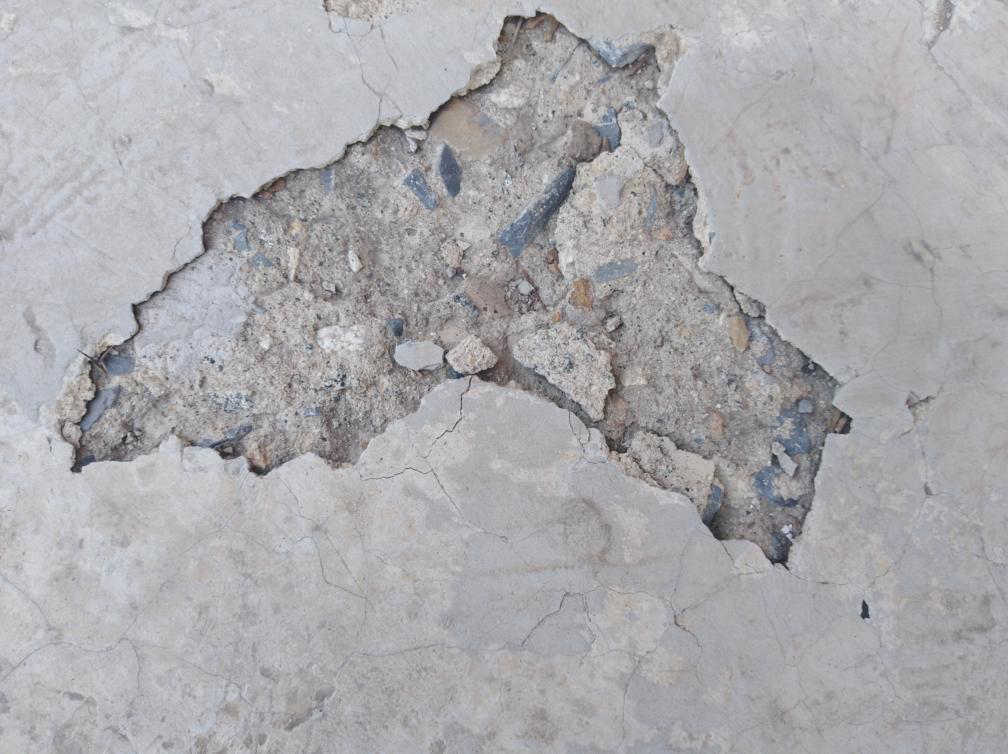

In [15]:
## bad case 0002703, good crack case 0281
input_img = Image.open('/media/App/tsai/capstone/coco/val2017/000132.jpg')
input_img

In [16]:
transform = T.Compose([
    T.Resize(800),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

img = transform(input_img).unsqueeze(0)
out = model(img)

In [17]:
scores = out["pred_logits"].softmax(-1)[..., :-1].max(-1)[0]
keep = scores > 0.8
mask = out["pred_masks"][keep]
mask = mask.detach()
print(mask.shape)
## we expect two masks, one for thing and one for stuff

torch.Size([2, 200, 268])


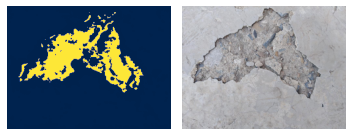

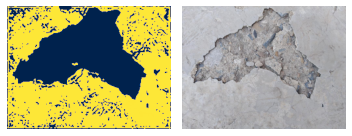

In [18]:
## to show single mask
def show(mask, img):
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(5, 5))
    axs[0].axis('off')
    axs[1].axis('off')

    axs[0].imshow(mask, cmap="cividis")
    axs[1].imshow(input_img)
    fig.tight_layout()
    plt.show()


## to show multiple masks
total_masks = keep.sum().item()
for i in range(total_masks):
    im = cv2.normalize(mask[i].numpy(), 0, 255).astype(np.uint8)
    show(im, input_img)

In [19]:
result = postprocessor(out, torch.as_tensor((input_img.height, input_img.width)).unsqueeze(0))[0]

/media/App/anaconda3/envs/NN/lib/python3.9/site-packages/torch/nn/functional.py:3454: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


In [20]:
# use panoptic api to crack the png_string
# The segmentation is stored in a special-format png
import itertools
import io
import seaborn as sns
from panopticapi.utils import id2rgb, rgb2id, IdGenerator

ann_cats = {1: {"isthing": 1, "color": (255,0,0)}, 
        2: {"isthing": 1, 'color': (0,255,0)},
        3: {"isthing": 1, 'color': (0,0,255)},
        4: {'isthing': 0, 'color': (127,127,127)}}
idgen = IdGenerator(ann_cats)

colorid, color, categoryid, id 8355711 (127, 127, 127) 4 0
colorid, color, categoryid, id 15400974 (14, 0, 235) 3 1


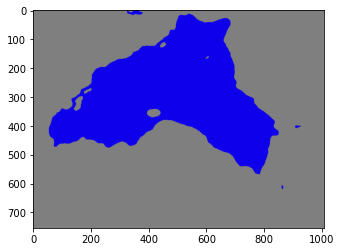

In [27]:
panoptic_seg = Image.open(io.BytesIO(result['png_string']))
panoptic_seg = np.array(panoptic_seg, dtype=np.uint8).copy()

panoptic_ = panoptic_seg[:, :, 0]
p = np.zeros(panoptic_seg.shape, dtype=np.uint8)

for r in result['segments_info']:
    id_ = r['id']
    catid = r['category_id']    
    colorid, color = idgen.get_id_and_color(catid)
    
    print("colorid, color, categoryid, id", colorid, color, catid, id_)
    flt = panoptic_ == id_
    p[:,:,0][flt] = color[0]
    p[:,:,1][flt] = color[1]
    p[:,:,2][flt] = color[2]
    
    
plt.imshow(p)
plt.show()